## Trajactory Analysis:

#### Skrypt powstał w celu analizy danych pochodzących z programu Fiji, wygenerowanych za pomocą pluginu TrackMate. Dane opisuja ścieżki ruchu chloroplastów w komórkach roślinnych. Dane zostały wstępnie przefiltrowane w programie Fiji. 

#### The scrip was created to analyze the data from the Fiji program, data are generated with the TrackMate plugin. The data describe the pathways of chloroplast movement in plant cells. The data has been pre-filtered in the Fiji program. 

In [1]:
# Setting optimal number of threads for kmeans:
%env OMP_NUM_THREADS=1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import os
# allow us to see results under cell code
%matplotlib inline


env: OMP_NUM_THREADS=1


### Setting working directory

In [110]:
pwd

'C:\\Users\\Alek\\Desktop\\Github_commits\\Trajectory_clustering\\training_csv'

In [111]:
os.getcwd( )

'C:\\Users\\Alek\\Desktop\\Github_commits\\Trajectory_clustering\\training_csv'

In [112]:
# Setting desired working directory:
os.chdir('C:\\Users\\Alek\\Desktop\\Github_commits\\Trajectory_clustering\\tracks_slabe_s_1_min')

In [113]:
# checking the setted directory:
os.getcwd()

'C:\\Users\\Alek\\Desktop\\Github_commits\\Trajectory_clustering\\tracks_slabe_s_1_min'

### Setting proper files to the variables:

In [217]:
tracks_df = 'tracks_slabe_s_1_min_nieb_40uE.csv'
spots_df = 'spots_slabe_s_1_min_nieb_40uE.csv'

### Importing raw data produced from Fiji and preparing them for the next steps:

In [218]:
# Checking the encoding of file:
with open(tracks_df) as f:
    print(f)

<_io.TextIOWrapper name='tracks_slabe_s_1_min_nieb_40uE.csv' mode='r' encoding='cp1250'>


In [219]:
raw_data = pd.read_csv(tracks_df, encoding='cp1250')
raw_data.shape # n instances n attribiutes in data_set

(158, 28)

In [117]:
# checking how data looks:
raw_data.head()

LABEL  TRACK_INDEX  TRACK_ID              NUMBER_SPOTS     NUMBER_GAPS  \
0    Label  Track index  Track ID  Number of spots in track  Number of gaps   
1    Label        Index        ID                   N spots          N gaps   
2      NaN          NaN       NaN                       NaN             NaN   
3  Track_5            5         5                       117               0   
4  Track_7            7         7                       137               0   

            NUMBER_SPLITS           NUMBER_MERGES            NUMBER_COMPLEX  \
0  Number of split events  Number of merge events  Number of complex points   
1                N splits                N merges                 N complex   
2                     NaN                     NaN                       NaN   
3                       0                       0                         0   
4                       0                       0                         0   

   LONGEST_GAP  TRACK_DURATION  ...       TRACK_MIN_SPEED  \
0  Longest gap  Track duration  ...       Track min speed   
1     Lgst gap        Duration  ...             Min speed   
2          NaN           (sec)  ...              (µm/sec)   
3            0           116.0  ...  0.015648379884808095   
4            0           136.0  ...  0.006059668664930866   

    TRACK_MEDIAN_SPEED      TRACK_STD_SPEED  TRACK_MEAN_QUALITY  \
0   Track median speed      Track std speed  Track mean quality   
1           Med. speed            Std speed              Mean Q   
2             (µm/sec)             (µm/sec)           (quality)   
3  0.29832415945290225  0.25156118974658825  0.9062738719149532   
4  0.30636671649049785   0.2079813684720942  0.9027336365985175   

   TOTAL_DISTANCE_TRAVELED  MAX_DISTANCE_TRAVELED    CONFINEMENT_RATIO  \
0  Total distance traveled  Max distance traveled    Confinement ratio   
1              Total dist.              Max dist.           Cfn. ratio   
2                     (µm)                   (µm)                  NaN   
3        36.38094061814306      5.325009016492907   0.1463680962068733   
4        38.36913779830641     2.9963363960287386  0.04909153222676086   

   MEAN_STRAIGHT_LINE_SPEED  LINEARITY_OF_FORWARD_PROGRESSION  \
0  Mean straight line speed  Linearity of forward progression   
1               Mn. v. line                       Fwd. progr.   
2                  (µm/sec)                               NaN   
3      0.045905250142180234               0.14636809620687324   
4      0.013849998270136672               0.04909153222676087   

   MEAN_DIRECTIONAL_CHANGE_RATE  
0  Mean directional change rate  
1                    Mn. ? rate  
2                     (rad/sec)  
3            1.6404801346604707  
4            1.6938149810594707  

[5 rows x 28 columns]

In [118]:
# Checking the information about loaded df:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   LABEL                             157 non-null    object
 1   TRACK_INDEX                       157 non-null    object
 2   TRACK_ID                          157 non-null    object
 3   NUMBER_SPOTS                      157 non-null    object
 4   NUMBER_GAPS                       157 non-null    object
 5   NUMBER_SPLITS                     157 non-null    object
 6   NUMBER_MERGES                     157 non-null    object
 7   NUMBER_COMPLEX                    157 non-null    object
 8   LONGEST_GAP                       157 non-null    object
 9   TRACK_DURATION                    158 non-null    object
 10  TRACK_START                       158 non-null    object
 11  TRACK_STOP                        158 non-null    object
 12  TRACK_DISPLACEMENT    

In [119]:
# Checking how many null values are in loaded data:
raw_data.isnull().sum()

LABEL                               1
TRACK_INDEX                         1
TRACK_ID                            1
NUMBER_SPOTS                        1
NUMBER_GAPS                         1
NUMBER_SPLITS                       1
NUMBER_MERGES                       1
NUMBER_COMPLEX                      1
LONGEST_GAP                         1
TRACK_DURATION                      0
TRACK_START                         0
TRACK_STOP                          0
TRACK_DISPLACEMENT                  0
TRACK_X_LOCATION                    0
TRACK_Y_LOCATION                    0
TRACK_Z_LOCATION                    0
TRACK_MEAN_SPEED                    0
TRACK_MAX_SPEED                     0
TRACK_MIN_SPEED                     0
TRACK_MEDIAN_SPEED                  0
TRACK_STD_SPEED                     0
TRACK_MEAN_QUALITY                  0
TOTAL_DISTANCE_TRAVELED             0
MAX_DISTANCE_TRAVELED               0
CONFINEMENT_RATIO                   1
MEAN_STRAIGHT_LINE_SPEED            0
LINEARITY_OF

In [120]:
# replacing NaN values to zeroes in all dataset:
raw_data.fillna(0)

LABEL  TRACK_INDEX  TRACK_ID              NUMBER_SPOTS  \
0         Label  Track index  Track ID  Number of spots in track   
1         Label        Index        ID                   N spots   
2             0            0         0                         0   
3       Track_5            5         5                       117   
4       Track_7            7         7                       137   
..          ...          ...       ...                       ...   
153  Track_3467         3467      3467                       116   
154  Track_3473         3473      3473                       104   
155  Track_3477         3477      3477                       114   
156  Track_3578         3578      3578                       100   
157  Track_3712         3712      3712                        90   

        NUMBER_GAPS           NUMBER_SPLITS           NUMBER_MERGES  \
0    Number of gaps  Number of split events  Number of merge events   
1            N gaps                N splits                N merges   
2                 0                       0                       0   
3                 0                       0                       0   
4                 0                       0                       0   
..              ...                     ...                     ...   
153               0                       0                       0   
154               0                       0                       0   
155               0                       0                       0   
156               0                       0                       0   
157               0                       0                       0   

               NUMBER_COMPLEX  LONGEST_GAP  TRACK_DURATION  ...  \
0    Number of complex points  Longest gap  Track duration  ...   
1                   N complex     Lgst gap        Duration  ...   
2                           0            0           (sec)  ...   
3                           0            0           116.0  ...   
4                           0            0           136.0  ...   
..                        ...          ...             ...  ...   
153                         0            0           115.0  ...   
154                         0            0           103.0  ...   
155                         0            0           113.0  ...   
156                         0            0            99.0  ...   
157                         0            0            89.0  ...   

          TRACK_MIN_SPEED   TRACK_MEDIAN_SPEED      TRACK_STD_SPEED  \
0         Track min speed   Track median speed      Track std speed   
1               Min speed           Med. speed            Std speed   
2                (µm/sec)             (µm/sec)             (µm/sec)   
3    0.015648379884808095  0.29832415945290225  0.25156118974658825   
4    0.006059668664930866  0.30636671649049785   0.2079813684720942   
..                    ...                  ...                  ...   
153   0.01253362898973331  0.33333790161155447  0.26728392627183595   
154  0.029352797196079552   0.3463437743067301  0.21748849138373558   
155   0.01916850071915878  0.40703728851310483  0.29265580866621055   
156  0.006226562779478155   0.2999879990384785  0.24259052401164544   
157   0.03566932981430993   0.4086033274658142  0.27506189425735605   

     TRACK_MEAN_QUALITY  TOTAL_DISTANCE_TRAVELED  MAX_DISTANCE_TRAVELED  \
0    Track mean quality  Total distance traveled  Max distance traveled   
1                Mean Q              Total dist.              Max dist.   
2             (quality)                     (µm)                   (µm)   
3    0.9062738719149532        36.38094061814306      5.325009016492907   
4    0.9027336365985175        38.36913779830641     2.9963363960287386   
..                  ...                      ...                    ...   
153  0.8204057339964241        44.84827332726672      8.625452847858188   
154   0.843885345527759       39.062161105482666      5.603631474001182   
155  0.

In [121]:
# Creating another df with columns used in firthere analysis:
df_from_raw = raw_data[['LABEL', 'TRACK_ID','TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED',
                          'TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                          'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED',
                          'LINEARITY_OF_FORWARD_PROGRESSION',
                          'MEAN_DIRECTIONAL_CHANGE_RATE']].copy()
# df_from_raw.head()

In [122]:
# Droping rows containing descriptive infomration about data:
df_dropped_rows = df_from_raw.drop(df_from_raw.index[[0,1,2]])

In [123]:
# Replacing all dots into commas in df:
df_dropped_rows.apply(lambda x: x.str.replace('.',','))

C:\Users\Alek\AppData\Local\Temp\ipykernel_1316\4041606918.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



LABEL TRACK_ID        TRACK_MIN_SPEED   TRACK_MEDIAN_SPEED  \
3       Track_5        5   0,015648379884808095  0,29832415945290225   
4       Track_7        7   0,006059668664930866  0,30636671649049785   
5       Track_8        8   0,026347102368592785   0,3139696019758109   
6       Track_9        9  0,0014591375582484716  0,20267622772890734   
7      Track_12       12   0,013320198438327905   0,3505294631528618   
..          ...      ...                    ...                  ...   
153  Track_3467     3467    0,01253362898973331  0,33333790161155447   
154  Track_3473     3473   0,029352797196079552   0,3463437743067301   
155  Track_3477     3477    0,01916850071915878  0,40703728851310483   
156  Track_3578     3578   0,006226562779478155   0,2999879990384785   
157  Track_3712     3712    0,03566932981430993   0,4086033274658142   

         TRACK_STD_SPEED TOTAL_DISTANCE_TRAVELED     CONFINEMENT_RATIO  \
3    0,25156118974658825       36,38094061814306    0,1463680962068733   
4     0,2079813684720942       38,36913779830641   0,04909153222676086   
5    0,27029205062297657       51,00229520871721   0,04760680233573461   
6     0,1500878006313894      107,00999680238634  0,033225002068436496   
7     0,2172664396134082       40,06551632309542   0,08007374337387782   
..                   ...                     ...                   ...   
153  0,26728392627183595       44,84827332726672    0,1843886594812542   
154  0,21748849138373558      39,062161105482666   0,13914093865674995   
155  0,29265580866621055       50,96080166412219   0,04107048819523246   
156  0,24259052401164544       35,60079330789126   0,09494268283396873   
157  0,27506189425735605        39,0283806153671   0,03331307966837491   

    MEAN_STRAIGHT_LINE_SPEED LINEARITY_OF_FORWARD_PROGRESSION  \
3       0,045905250142180234              0,14636809620687324   
4       0,013849998270136672              0,04909153222676087   
5       0,017985601382742106              0,04760680233573458   
6      0,0077123804015242275              0,03322500206843648   
7        0,02695962917812988              0,08007374337387782   
..                       ...                              ...   
153      0,07190880868577042               0,1843886594812543   
154      0,05276840545803929               0,1391409386567499   
155     0,018521991178459405              0,04107048819523247   
156      0,03414176593604845              0,09494268283396874   
157     0,014608489356936889               0,0333130796683749   

    MEAN_DIRECTIONAL_CHANGE_RATE  
3             1,6404801346604707  
4             1,6938149810594707  
5             1,8144498984183561  
6              1,924168110784209  
7             1,9756477470188734  
..                           ...  
153           1,9803285604653857  
154           1,9500041174962577  
155           2,0170615216131673  
156           1,7714481087271932  
157           2,1322292312223095  

[155 rows x 10 columns]

In [124]:
# Setting the proper index order:
df_dropped_rows = df_dropped_rows.reset_index(level=None, drop=True)
# df_dropped_rows.head()

In [125]:
# Changing data types from object to float:
# Changing numerical values first:
df_w_floats = df_dropped_rows.iloc[:, 2:10].astype('float')
# We also adding the label column with the names of tracks changed to string
df_w_floats['LABEL'] = df_dropped_rows['LABEL'].astype('string')
df_w_floats['TRACK_ID'] = df_dropped_rows['TRACK_ID'].astype('int')
df_w_floats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   155 non-null    float64
 1   TRACK_MEDIAN_SPEED                155 non-null    float64
 2   TRACK_STD_SPEED                   155 non-null    float64
 3   TOTAL_DISTANCE_TRAVELED           155 non-null    float64
 4   CONFINEMENT_RATIO                 155 non-null    float64
 5   MEAN_STRAIGHT_LINE_SPEED          155 non-null    float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  155 non-null    float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      155 non-null    float64
 8   LABEL                             155 non-null    string 
 9   TRACK_ID                          155 non-null    int32  
dtypes: float64(8), int32(1), string(1)
memory usage: 11.6 KB


In [126]:
# Making subset of only numeric values without the labels:
df_wo_labels = df_w_floats.copy()
df_wo_labels = df_wo_labels.drop('LABEL', axis=1)
df_wo_labels = df_wo_labels.drop('TRACK_ID', axis=1)
df_wo_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   155 non-null    float64
 1   TRACK_MEDIAN_SPEED                155 non-null    float64
 2   TRACK_STD_SPEED                   155 non-null    float64
 3   TOTAL_DISTANCE_TRAVELED           155 non-null    float64
 4   CONFINEMENT_RATIO                 155 non-null    float64
 5   MEAN_STRAIGHT_LINE_SPEED          155 non-null    float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  155 non-null    float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      155 non-null    float64
dtypes: float64(8)
memory usage: 9.8 KB


### Preperation of boxplots for each feature:

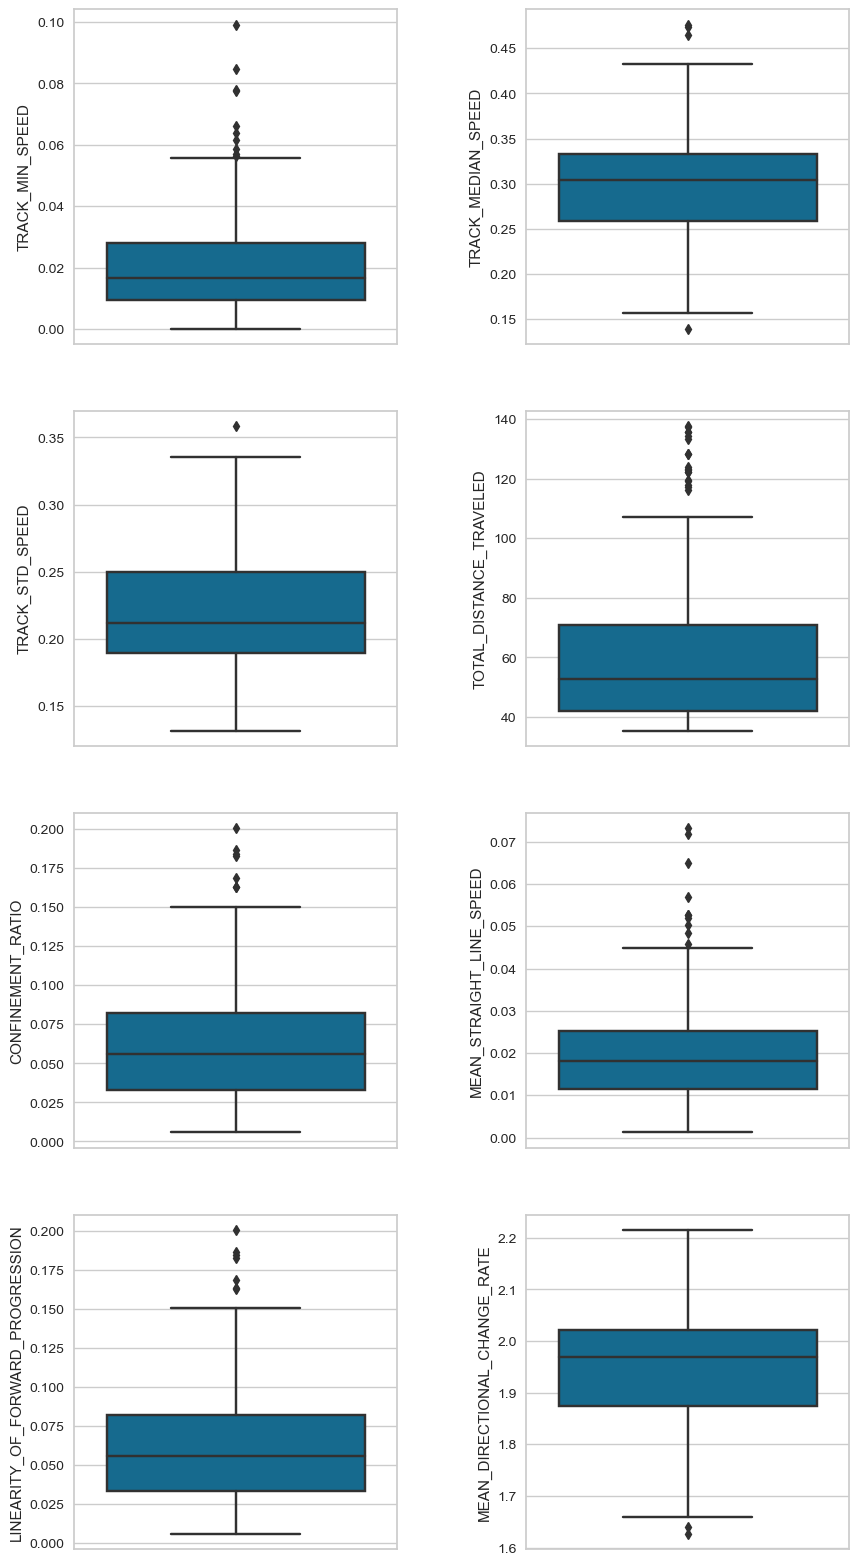

In [127]:
plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
# 1. Boxplot TRACK_MIN_SPEED
sns.boxplot(data=df_wo_labels, y='TRACK_MIN_SPEED')
plt.subplot(4,2,2)
# 2. Boxplot TRACK_MEDIAN_SPEED
sns.boxplot(data=df_wo_labels, y='TRACK_MEDIAN_SPEED')
plt.subplot(4,2,3)
# 3. Boxplot TRACK_STD_SPEED
sns.boxplot(data=df_wo_labels, y='TRACK_STD_SPEED')
plt.subplot(4,2,4)
# 4. Boxplot TOTAL_DISTANCE_TRAVELED
sns.boxplot(data=df_wo_labels, y='TOTAL_DISTANCE_TRAVELED')
plt.subplot(4,2,5)
# 5. Boxplot CONFINEMENT_RATIO
sns.boxplot(data=df_wo_labels, y='CONFINEMENT_RATIO')
plt.subplot(4,2,6)
# 6. Boxplot MEAN_STRAIGHT_LINE_SPEED
sns.boxplot(data=df_wo_labels, y='MEAN_STRAIGHT_LINE_SPEED')
plt.subplot(4,2,7)
# 7. Boxplot LINEARITY_OF_FORWARD_PROGRESSION
sns.boxplot(data=df_wo_labels, y='LINEARITY_OF_FORWARD_PROGRESSION')
plt.subplot(4,2,8)
# 8. Boxplot MEAN_DIRECTIONAL_CHANGE_RATE
sns.boxplot(data=df_wo_labels, y='MEAN_DIRECTIONAL_CHANGE_RATE')
plt.subplots_adjust(wspace=0.4)
plt.savefig("box_plot_out.jpg")
plt.show()

### Distribution of features:

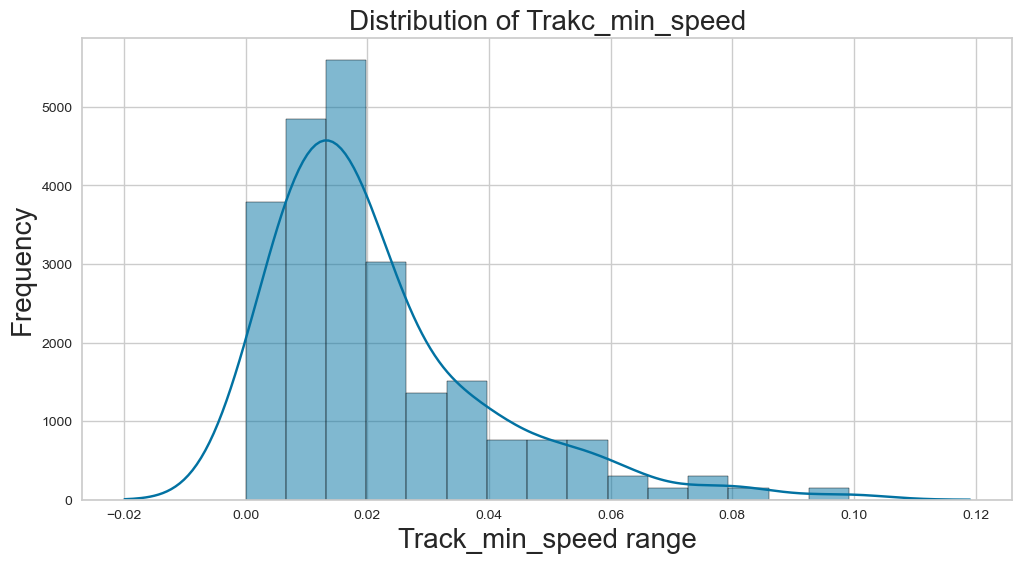

In [128]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TRACK_MIN_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of Trakc_min_speed", fontsize=20)
plt.xlabel('Track_min_speed range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_min_speed_out.jpg")

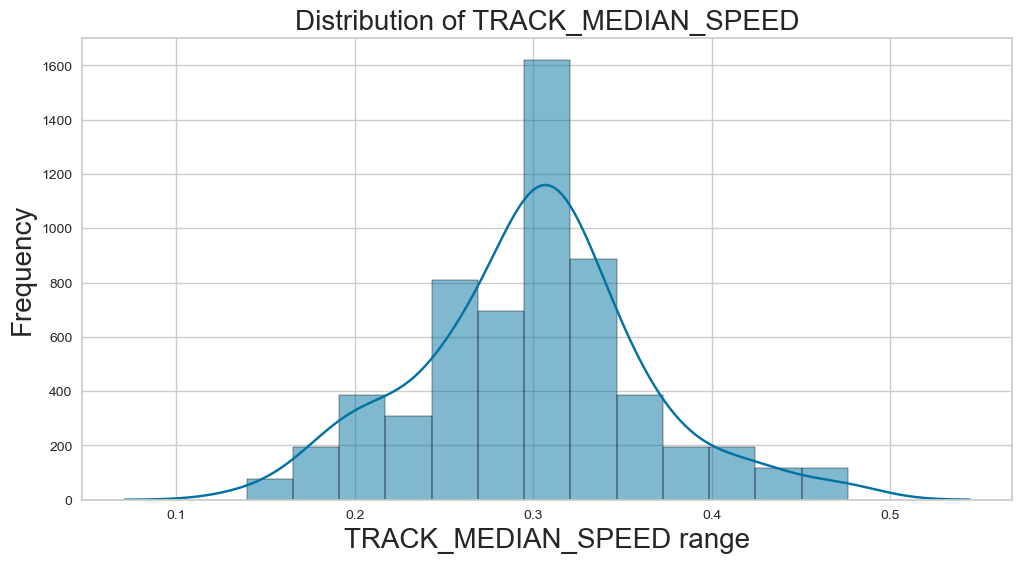

In [129]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TRACK_MEDIAN_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of TRACK_MEDIAN_SPEED", fontsize=20)
plt.xlabel('TRACK_MEDIAN_SPEED range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_median_speed_out.jpg")

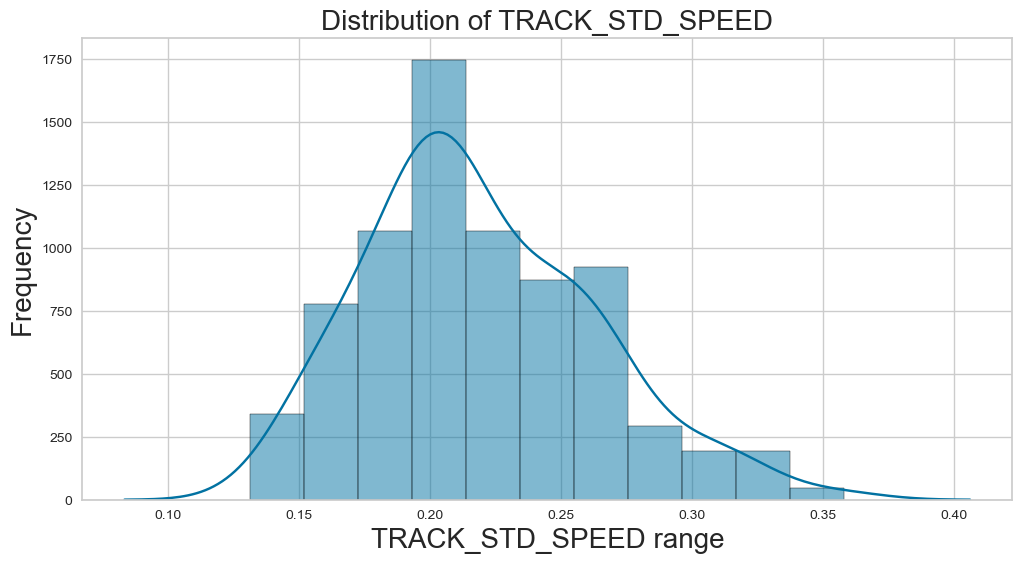

In [130]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TRACK_STD_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of TRACK_STD_SPEED", fontsize=20)
plt.xlabel('TRACK_STD_SPEED range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_track_std_out.jpg")

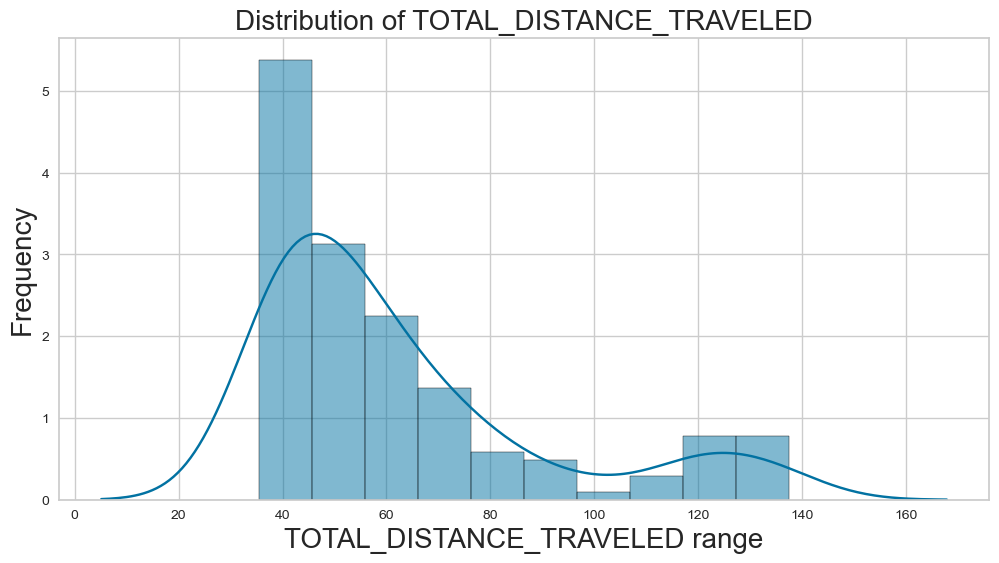

In [131]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TOTAL_DISTANCE_TRAVELED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of TOTAL_DISTANCE_TRAVELED", fontsize=20)
plt.xlabel('TOTAL_DISTANCE_TRAVELED range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_total_distance_out.jpg")

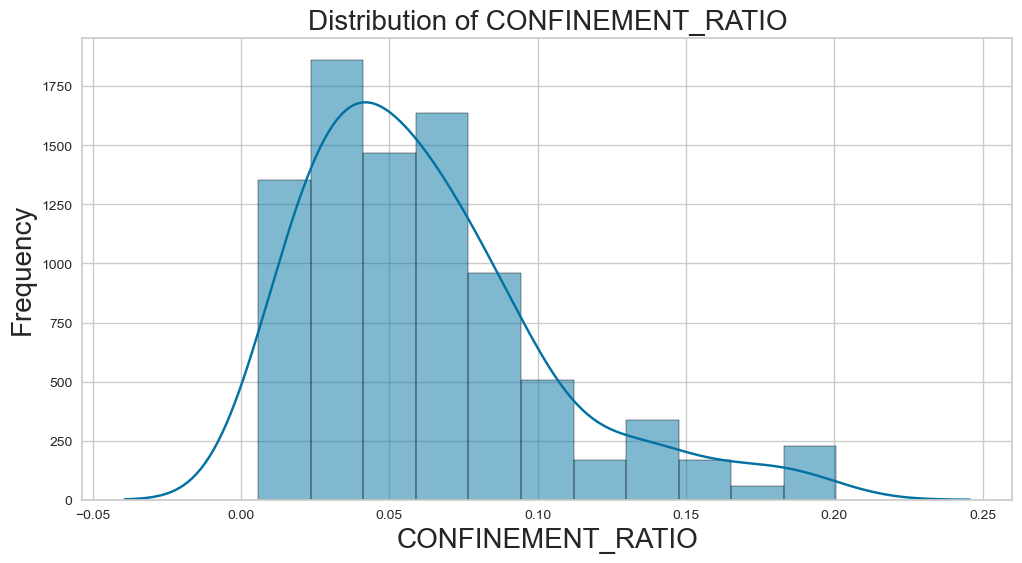

In [132]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['CONFINEMENT_RATIO'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of CONFINEMENT_RATIO", fontsize=20)
plt.xlabel('CONFINEMENT_RATIO', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_confinement_out.jpg")

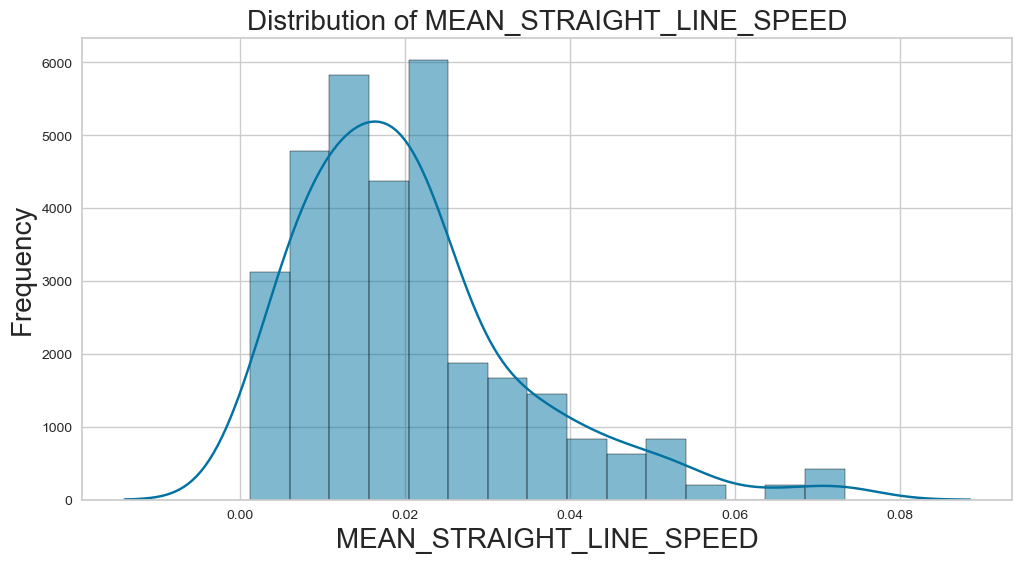

In [133]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['MEAN_STRAIGHT_LINE_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of MEAN_STRAIGHT_LINE_SPEED", fontsize=20)
plt.xlabel('MEAN_STRAIGHT_LINE_SPEED', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_mean_straight_out.jpg")

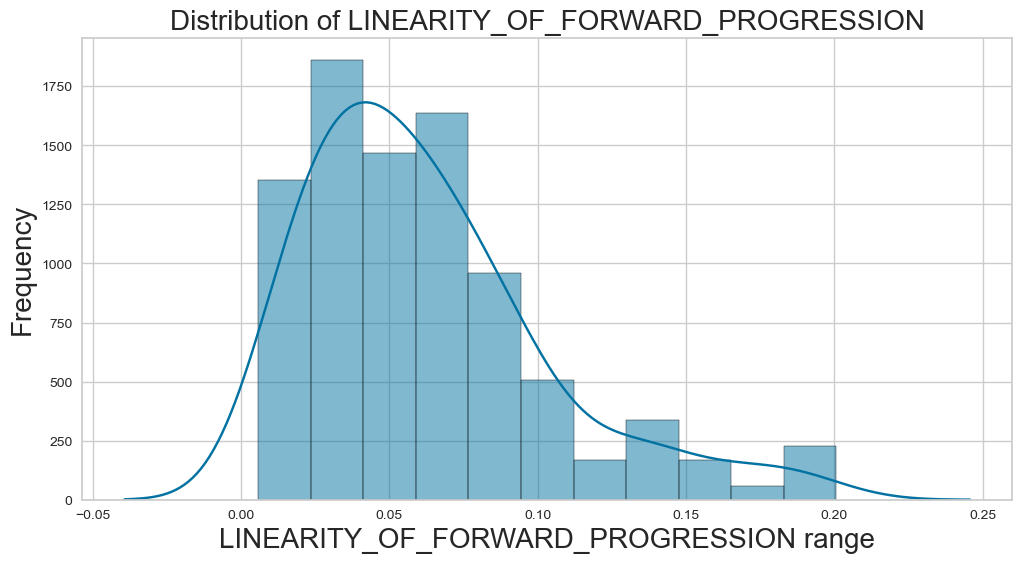

In [134]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['LINEARITY_OF_FORWARD_PROGRESSION'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of LINEARITY_OF_FORWARD_PROGRESSION", fontsize=20)
plt.xlabel('LINEARITY_OF_FORWARD_PROGRESSION range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_linearity_out.jpg")

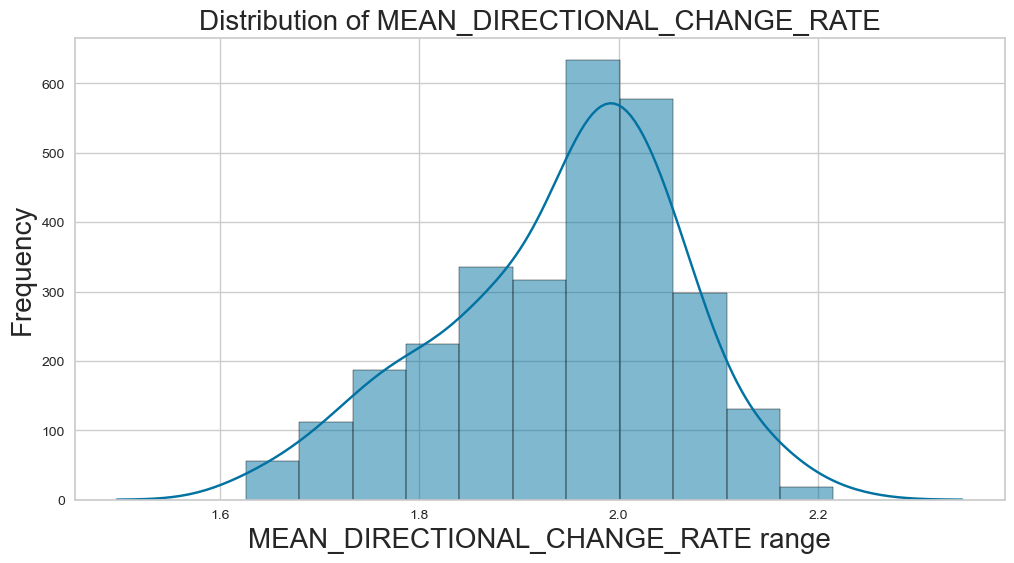

In [135]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['MEAN_DIRECTIONAL_CHANGE_RATE'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of MEAN_DIRECTIONAL_CHANGE_RATE", fontsize=20)
plt.xlabel('MEAN_DIRECTIONAL_CHANGE_RATE range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig("dist_mean_dchange_out.jpg")

### Q-Q plots:

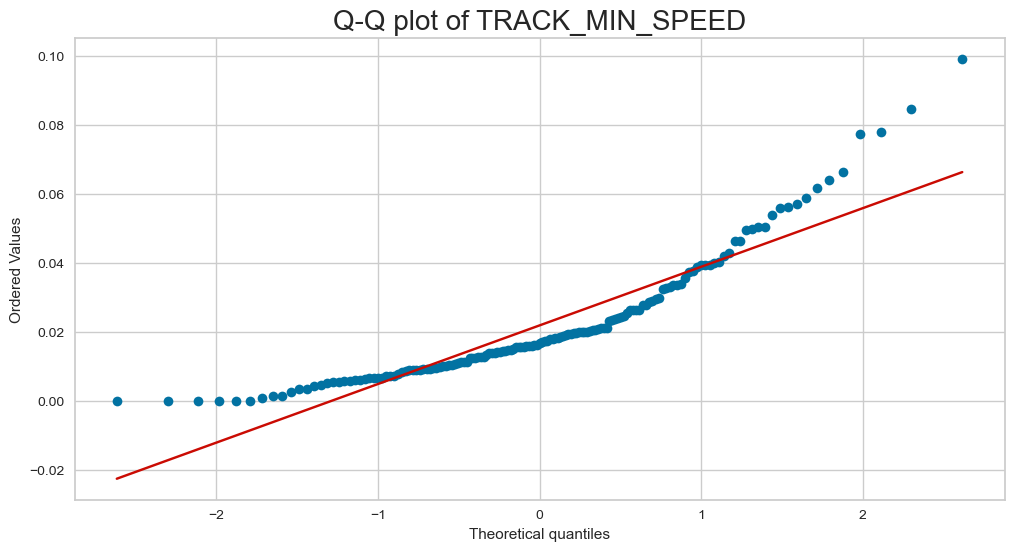

In [136]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TRACK_MIN_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TRACK_MIN_SPEED", fontsize=20)
# plt.savefig("QQ_min_speed_out.jpg")
plt.show()

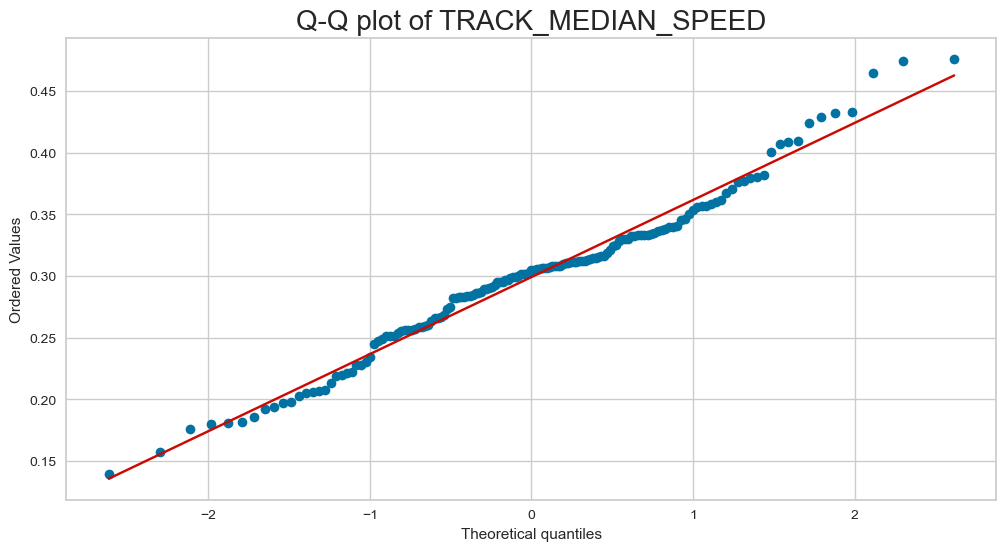

In [137]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TRACK_MEDIAN_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TRACK_MEDIAN_SPEED", fontsize=20)
# plt.savefig("QQ_track_median_out.jpg")
plt.show()

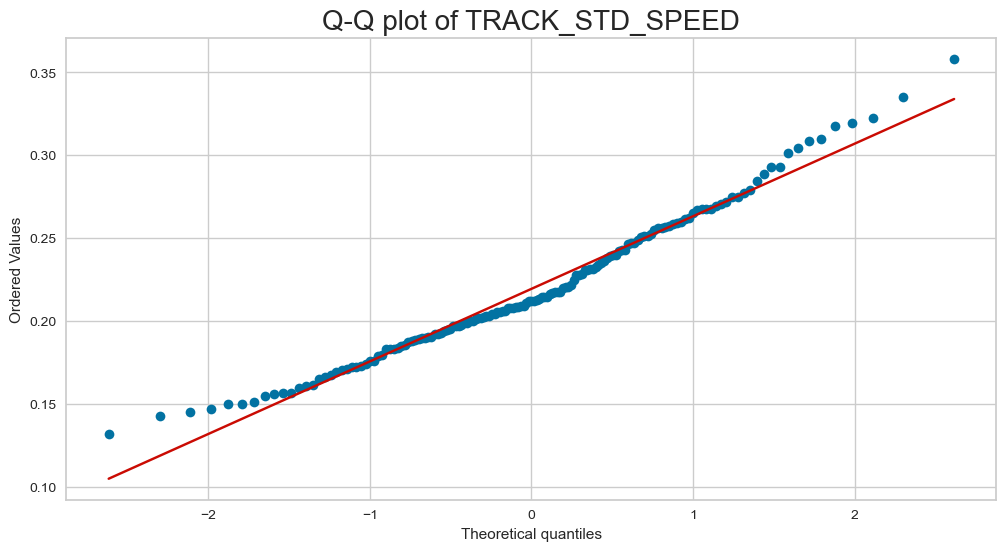

In [138]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TRACK_STD_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TRACK_STD_SPEED", fontsize=20)
# plt.savefig("QQ_std_speed_out.jpg")
plt.show()

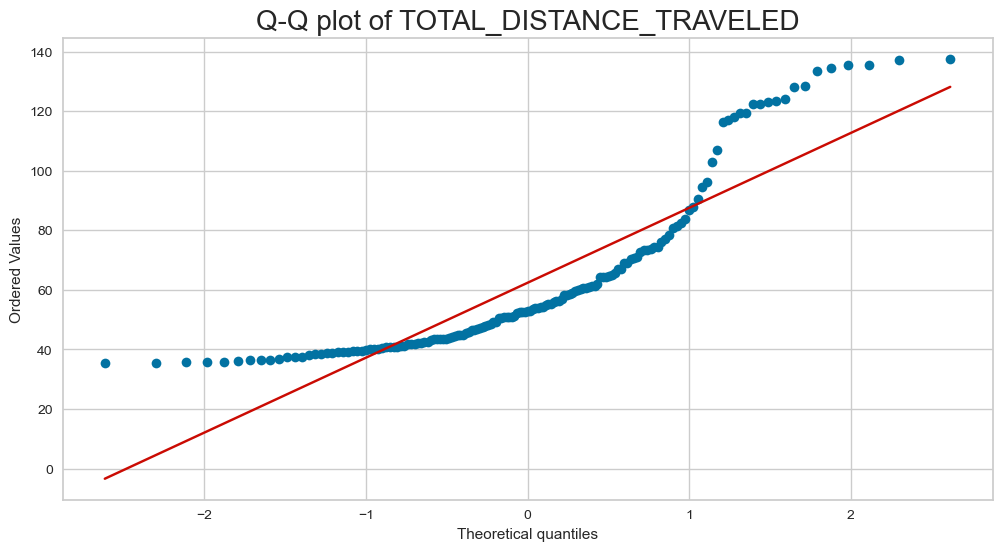

In [139]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TOTAL_DISTANCE_TRAVELED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TOTAL_DISTANCE_TRAVELED", fontsize=20)
# plt.savefig("QQ_total_distance_out.jpg")
plt.show()

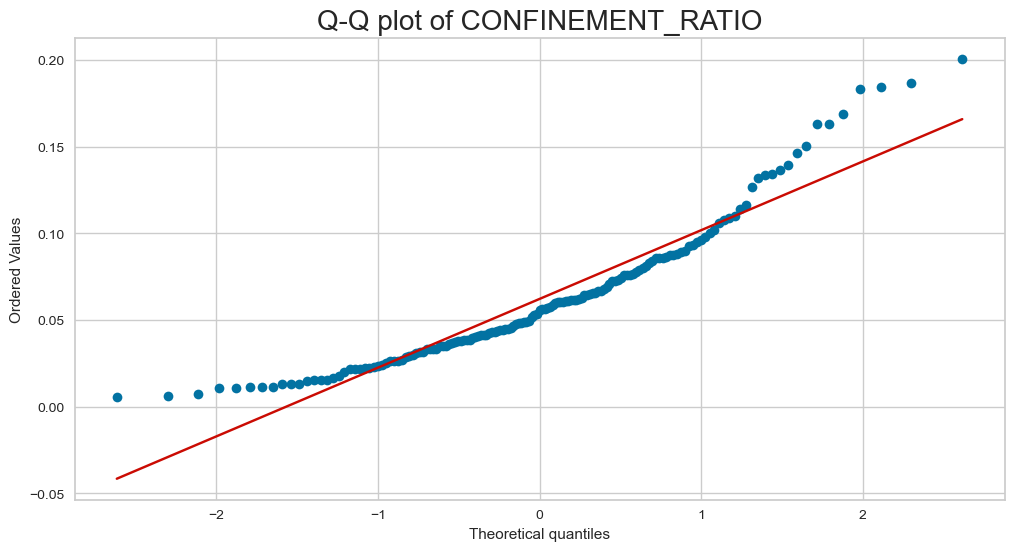

In [140]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['CONFINEMENT_RATIO'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of CONFINEMENT_RATIO", fontsize=20)
# plt.savefig("QQ_confinement_out.jpg")
plt.show()

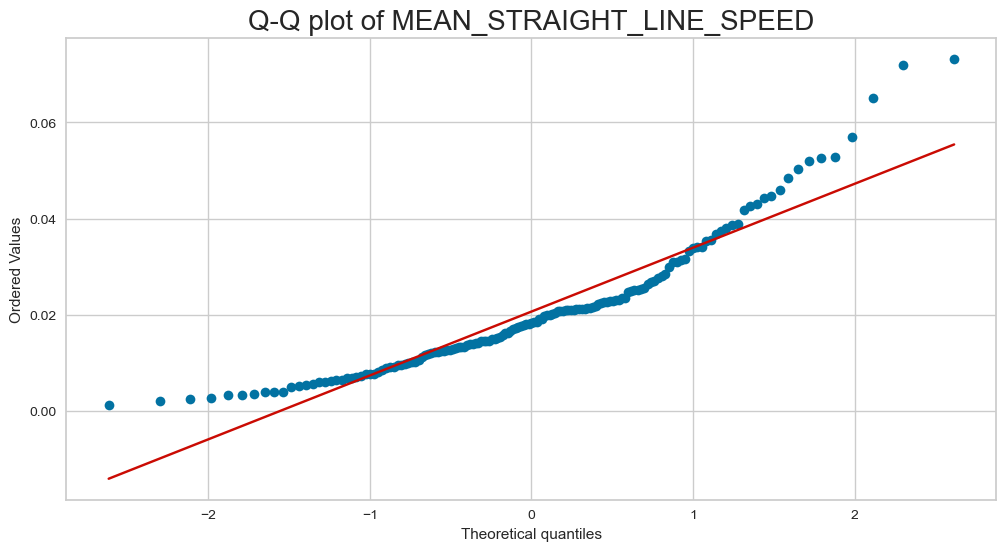

In [141]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['MEAN_STRAIGHT_LINE_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of MEAN_STRAIGHT_LINE_SPEED", fontsize=20)
# plt.savefig("QQ_mean_straight_out.jpg")
plt.show()

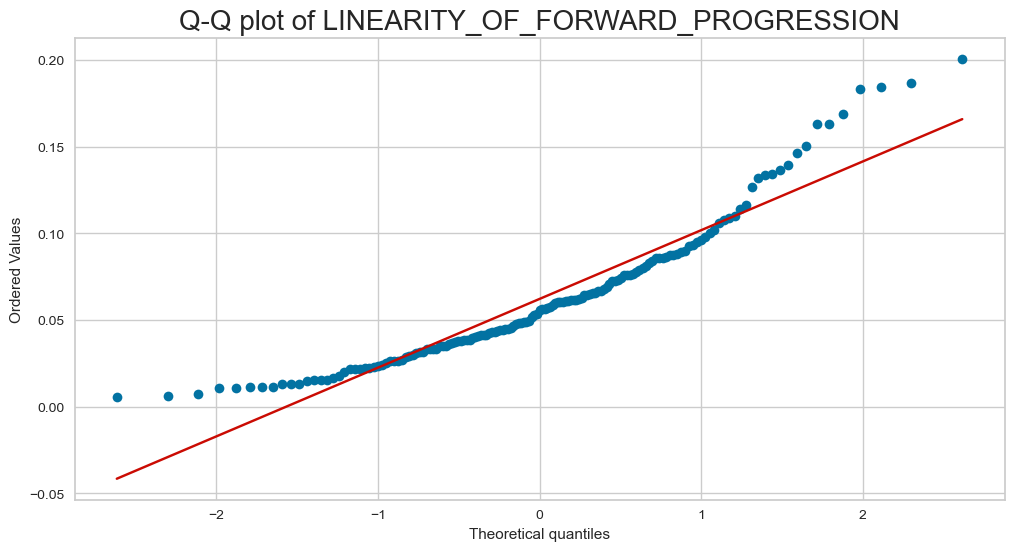

In [142]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['LINEARITY_OF_FORWARD_PROGRESSION'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of LINEARITY_OF_FORWARD_PROGRESSION", fontsize=20)
# plt.savefig("QQ_linearity_out.jpg")
plt.show()

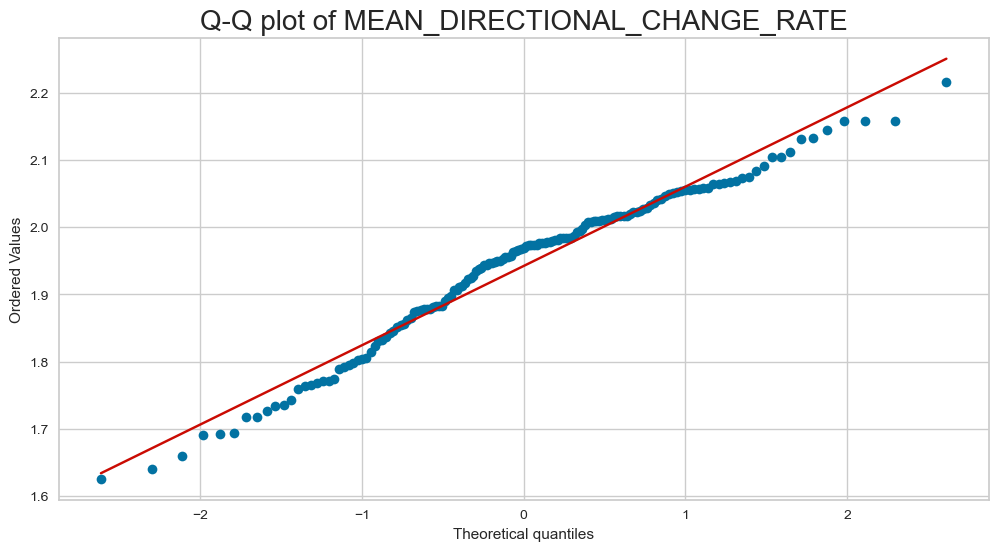

In [143]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['MEAN_DIRECTIONAL_CHANGE_RATE'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of MEAN_DIRECTIONAL_CHANGE_RATE", fontsize=20)
# plt.savefig("QQ_mean_directional_out.jpg")
plt.show()

In [144]:
# Testing the normality of data, by Shapiro-Wilk test:
from scipy.stats import shapiro

for (columnName, columnData) in df_wo_labels.iteritems():
    print(f'{columnName}')
    # normality test
    stat, p = shapiro(columnData)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

TRACK_MIN_SPEED
Statistics=0.858, p=0.000
Sample does not look Gaussian (reject H0)

TRACK_MEDIAN_SPEED
Statistics=0.981, p=0.032
Sample does not look Gaussian (reject H0)

TRACK_STD_SPEED
Statistics=0.976, p=0.009
Sample does not look Gaussian (reject H0)

TOTAL_DISTANCE_TRAVELED
Statistics=0.805, p=0.000
Sample does not look Gaussian (reject H0)

CONFINEMENT_RATIO
Statistics=0.908, p=0.000
Sample does not look Gaussian (reject H0)

MEAN_STRAIGHT_LINE_SPEED
Statistics=0.897, p=0.000
Sample does not look Gaussian (reject H0)

LINEARITY_OF_FORWARD_PROGRESSION
Statistics=0.908, p=0.000
Sample does not look Gaussian (reject H0)

MEAN_DIRECTIONAL_CHANGE_RATE
Statistics=0.971, p=0.003
Sample does not look Gaussian (reject H0)



### Checking correlation between data:

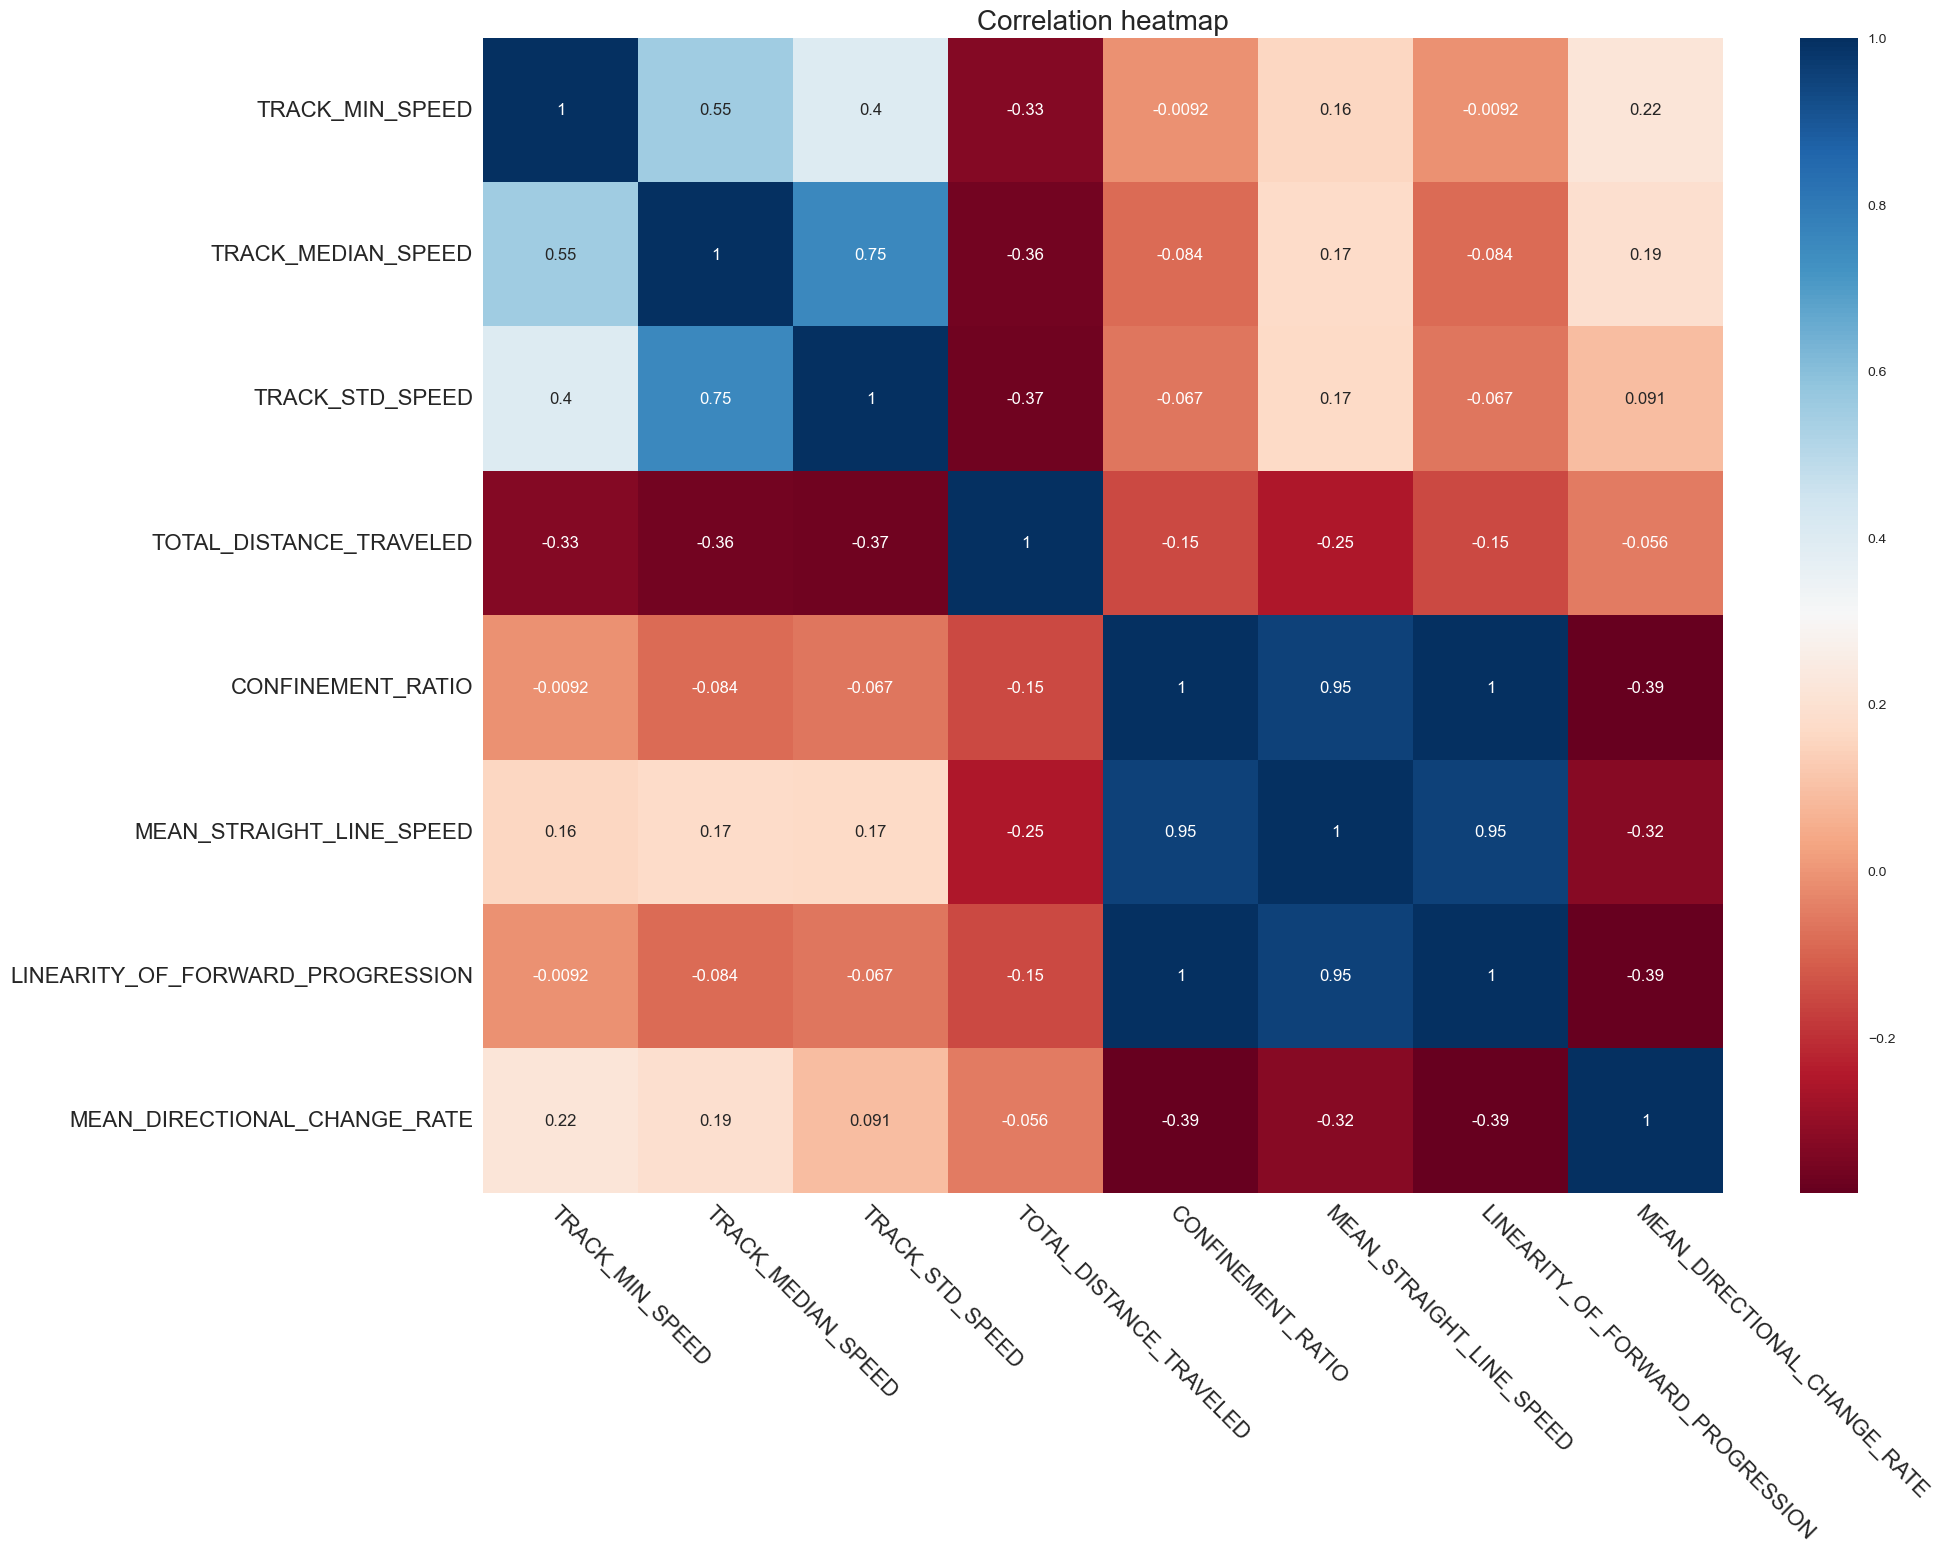

In [145]:
plt.figure(figsize=(20,15))
sns.heatmap(df_wo_labels.corr(method='spearman'),
            annot=True, cmap='RdBu')
plt.title('Correlation heatmap', fontsize=20)
plt.yticks(rotation=0, fontsize = 16)
plt.xticks(rotation=-45, ha='left', rotation_mode='anchor', fontsize = 16)
plt.savefig("heatmap_spearman_out.jpg")
plt.show()

### Cluster analysis:

In [146]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling data: performing clustering on dataset with all features

df_wol_scale = df_wo_labels.copy()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_wol_scale.values),
                        columns=df_wol_scale.columns,
                         index=df_wol_scale.index)
df_scaled.head()

TRACK_MIN_SPEED  TRACK_MEDIAN_SPEED  TRACK_STD_SPEED  \
0        -0.339461           -0.012351         0.736581   
1        -0.868744            0.116814        -0.260724   
2         0.251093            0.238917         1.165229   
3        -1.122686           -1.548469        -1.585594   
4        -0.467973            0.826073        -0.048239   

   TOTAL_DISTANCE_TRAVELED  CONFINEMENT_RATIO  MEAN_STRAIGHT_LINE_SPEED  \
0                -0.941907           2.053055                  1.823488   
1                -0.869826          -0.318611                 -0.490952   
2                -0.411813          -0.354810                 -0.192355   
3                 1.618733          -0.705448                 -0.934098   
4                -0.808324           0.436755                  0.455584   

   LINEARITY_OF_FORWARD_PROGRESSION  MEAN_DIRECTIONAL_CHANGE_RATE  
0                          2.053055                     -2.560068  
1                         -0.318611                     -2.107363  
2                         -0.354810                     -1.083417  
3                         -0.705448                     -0.152132  
4                          0.436755                      0.284826

In [147]:
# Converting our data fram to np.array:

whole_df = np.array(df_scaled.loc[:,['TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED',
                                     'TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                                     'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED',
                                     'LINEARITY_OF_FORWARD_PROGRESSION',
                                     'MEAN_DIRECTIONAL_CHANGE_RATE']])

In [148]:
# Determining the number of clusters using the elbow method:

'''
Inertia can be recognized as a measure of how internally coherent clusters are. 
'''
inertia = []
n_clust = range(1,10)

for n in n_clust:
    kmeanModel =  KMeans(n_clusters=n)
    kmeanModel.fit(whole_df)
    inertia.append(kmeanModel.inertia_)

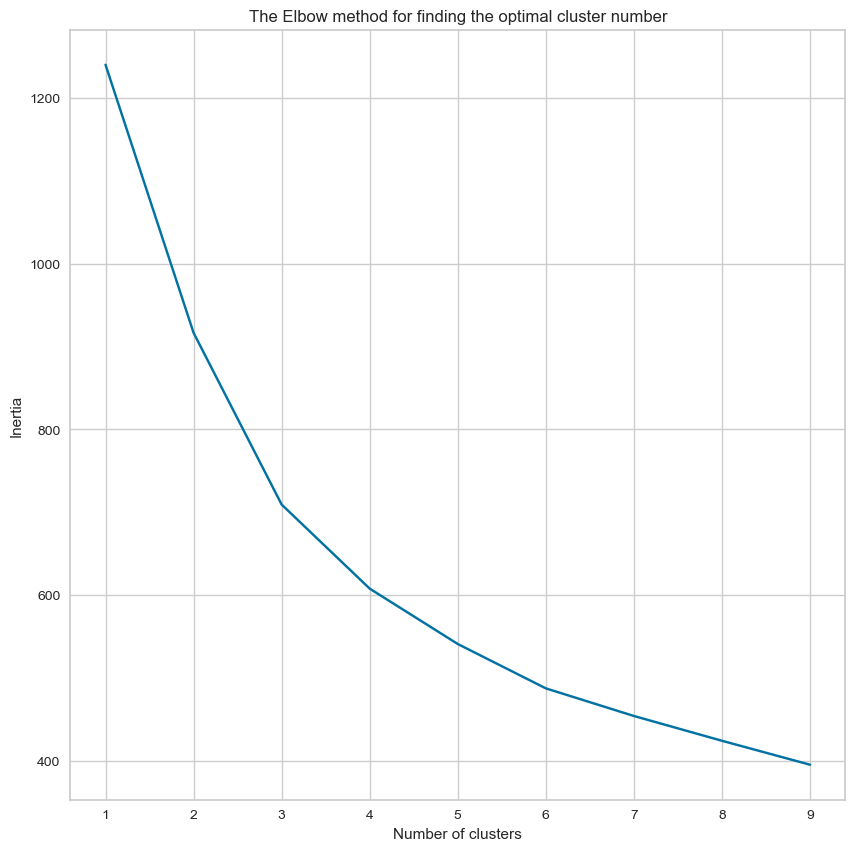

In [149]:
# Ploting the disortions of K-means:
plt.figure(figsize=(10,10))
# bx- = [blue][markers as x][- skip this argument]
plt.plot(n_clust, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow method for finding the optimal cluster number')
plt.show()

In [150]:
# The Silhuette score metod for defining number of clusters

from sklearn.metrics import silhouette_score

sil = []
n_clust_max = range(2,11)

# To perform this method we have to start from 2 clusters:
for n in n_clust_max:
    kmeans_sil = KMeans(n_clusters=n).fit(whole_df)
    labels = kmeans_sil.labels_
    sil.append(silhouette_score(whole_df, labels, metric = 'euclidean'))

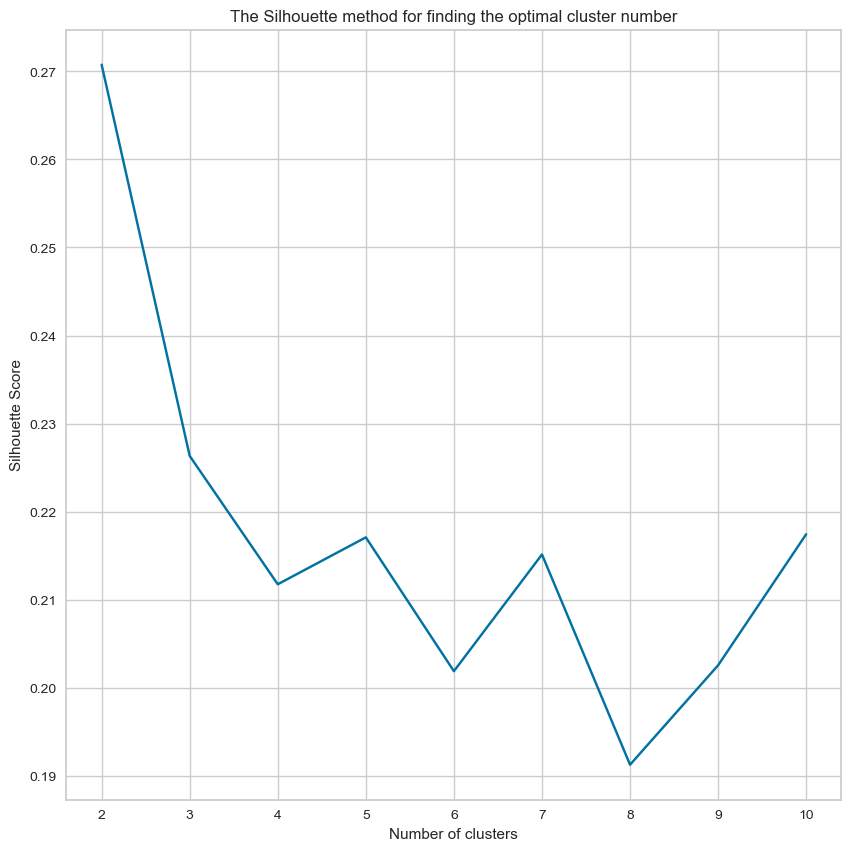

In [151]:
# Ploting the values of Silhouette score:
plt.figure(figsize=(10,10))
plt.plot(n_clust_max, sil)
plt.xlabel('Number of clusters')
plt.ylabel("Silhouette Score")
plt.title("The Silhouette method for finding the optimal cluster number")
plt.show()

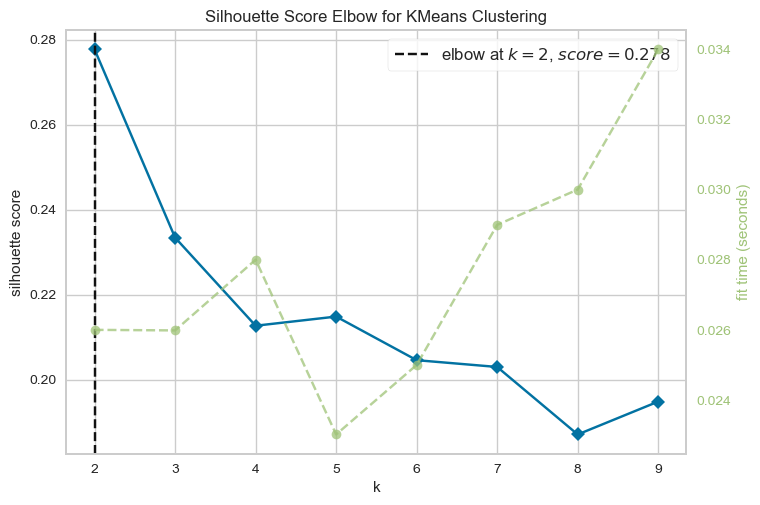

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [152]:
# Silhouette score with automatic suggestion of the cluster number

from yellowbrick.cluster import KElbowVisualizer
model = KMeans() 
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True, metric='silhouette')
visualizer.fit(whole_df)        # Fit data to visualizer
visualizer.show() 

In [153]:
# Performing clustering:
# kmeans_fp = kmeans fixed parameters
kmeans_fp = KMeans(n_clusters=2, init='k-means++', n_init=50, max_iter=15000,
                  random_state=1)
labels_fp = kmeans_fp.fit_predict(whole_df)
# print(labels_fp)

In [154]:
df_scaled_w_label = df_scaled.copy()
df_scaled_w_label['Label'] = labels_fp
df_scaled_w_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   155 non-null    float64
 1   TRACK_MEDIAN_SPEED                155 non-null    float64
 2   TRACK_STD_SPEED                   155 non-null    float64
 3   TOTAL_DISTANCE_TRAVELED           155 non-null    float64
 4   CONFINEMENT_RATIO                 155 non-null    float64
 5   MEAN_STRAIGHT_LINE_SPEED          155 non-null    float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  155 non-null    float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      155 non-null    float64
 8   Label                             155 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 10.4 KB


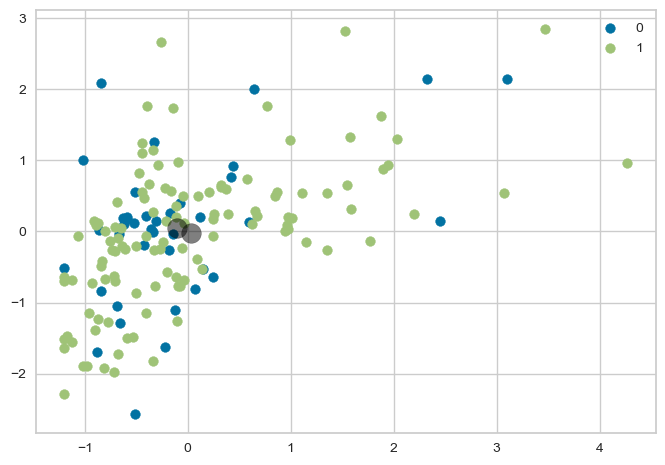

In [155]:
# Data with labels and centroids:
u_labels = np.unique(labels_fp)
# print(u_labels)
for i in u_labels:
    plt.scatter(whole_df[labels_fp==i, 0], whole_df[labels_fp==i, 1],
                label=i)
centers = kmeans_fp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.legend()
plt.show()

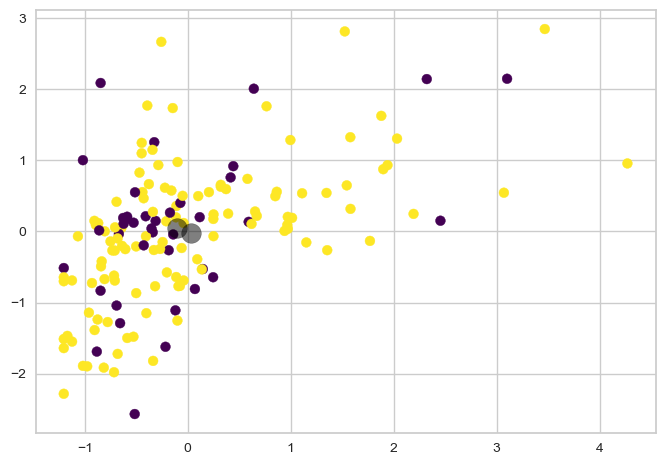

In [156]:
# Ploting the data with labels:
points= plt.scatter(whole_df[:, 0], whole_df[:, 1], c=labels_fp, s=50,
            cmap='viridis')

centers = kmeans_fp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

### All features together plotted with each other

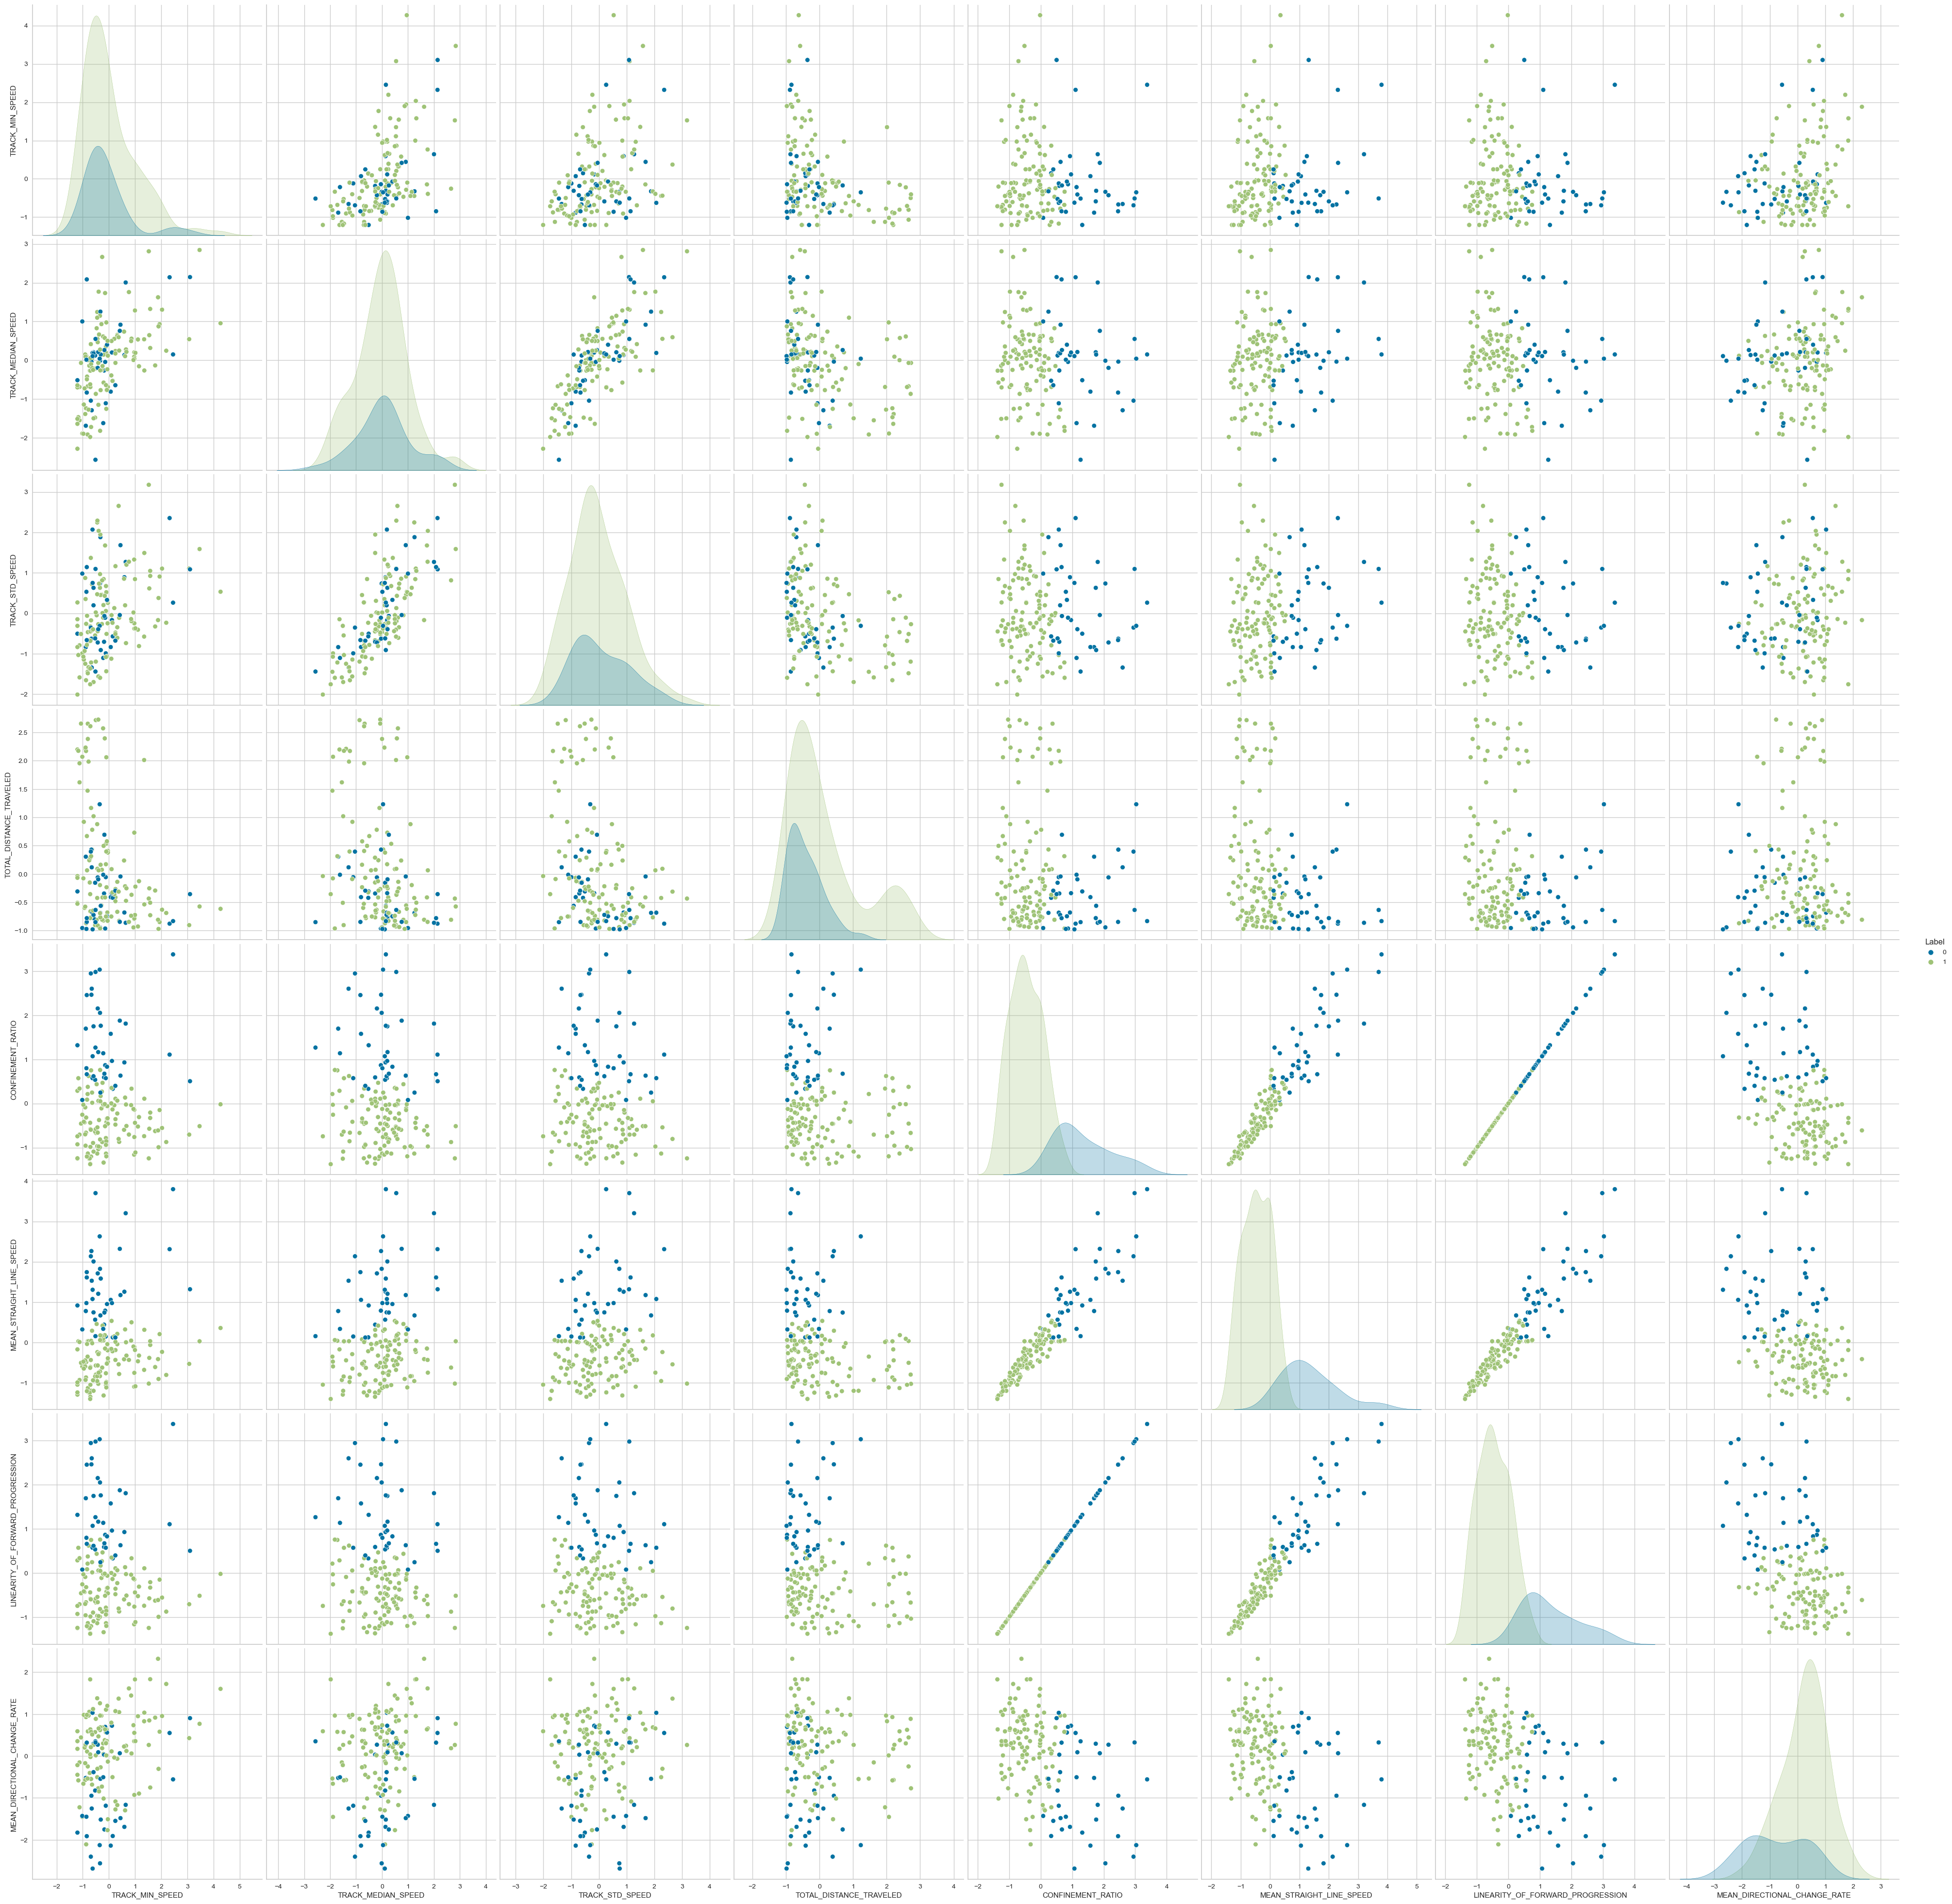

In [157]:
pair_plot = sns.pairplot(df_scaled_w_label, hue='Label', height=5)
# Saving plot to png:
plt.savefig("pair_plot_out.jpg")

### Polar plot of clusters features

In [158]:
import plotly.express as px
import kaleido

polar=df_scaled_w_label.groupby('Label').median().reset_index()
polar=pd.melt(polar, id_vars=['Label'])

fig = px.line_polar(polar, r='value', 
                    theta='variable', color='Label', 
                   line_close=True, height=800, width=1000)

fig.write_image("line_polar_2K.jpeg")
fig.show()

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [159]:
# Grouping by labels which make groups by cluster
pie_df = df_scaled_w_label.groupby('Label').size().reset_index()
# naming columns of df to make them nor normal names insted of generated by code
pie_df.columns=['Label', 'value']
fig_pie = px.pie(pie_df, values='value', names='Label', color='Label',
                title='Population of clusters')
fig_pie.write_image("pie_plot_2K.jpeg")
fig_pie.show()

In [160]:
# Cluster participation:

cust0=df_scaled_w_label[df_scaled_w_label.Label==0]
print(f"The number of observation in cluster 0 = {len(cust0)}")
print(f"The observation indexes from data_frame are:{cust0.index.values}")
print("===========================================\n")
cust1=df_scaled_w_label[df_scaled_w_label.Label==1]
print(f"The number of observation in cluster 1 = {len(cust1)}")
print(f"The observation indexes from data_frame are:{cust1.index.values}")
print("===========================================\n")


The number of observation in cluster 0 = 39
The observation indexes from data_frame are:[  0   5  10  13  14  21  23  32  41  49  51  52  56  61  79  81  82  83
  84  88  92  93  94  96 100 109 117 125 128 129 130 132 133 144 146 148
 150 151 153]

The number of observation in cluster 1 = 116
The observation indexes from data_frame are:[  1   2   3   4   6   7   8   9  11  12  15  16  17  18  19  20  22  24
  25  26  27  28  29  30  31  33  34  35  36  37  38  39  40  42  43  44
  45  46  47  48  50  53  54  55  57  58  59  60  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  80  85  86  87  89  90  91
  95  97  98  99 101 102 103 104 105 106 107 108 110 111 112 113 114 115
 116 118 119 120 121 122 123 124 126 127 131 134 135 136 137 138 139 140
 141 142 143 145 147 149 152 154]



### Using UMAP method to reduce dimensionality:

In [161]:
from umap import UMAP

# making df for umap approach:
df_umap = df_scaled.copy()

umap_reducer = UMAP(n_neighbors=15, n_components=2, metric='euclidean',
                   n_epochs=1000, random_state = 42, transform_seed=43)

umap_transformed = umap_reducer.fit_transform(df_umap)
umap_transformed.shape

(155, 2)

In [162]:
# Performing clustering on reduced set:
kmeans_after_umap = KMeans(n_clusters=2, init='k-means++', n_init=50,
                           max_iter=15000, random_state=1)
labels_after_umap = kmeans_after_umap.fit_predict(umap_transformed)
print(labels_after_umap)

[0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0]


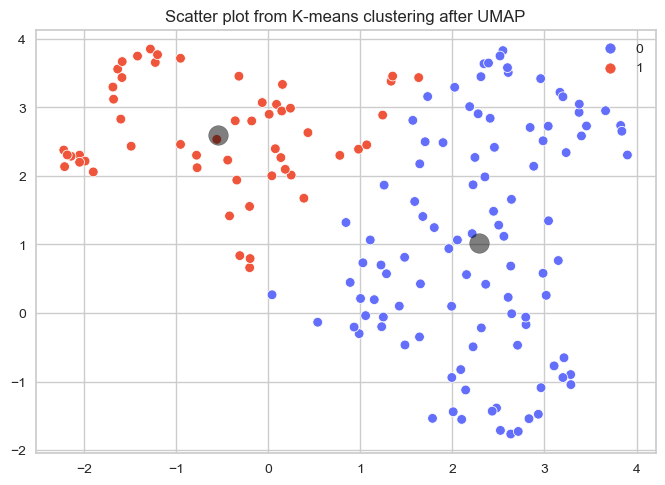

In [163]:
colors_from_plotly = ['#636EFA', '#EF553B']
sns.scatterplot(x = umap_transformed[:,0], y = umap_transformed[:, 1],
                data = umap_transformed, hue = labels_after_umap, 
                palette = colors_from_plotly
               ).set_title('Scatter plot from K-means clustering after UMAP')

centers = kmeans_after_umap.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.savefig("Scatter_umap_out.jpg")
plt.show()

In [164]:
# Making df for umap_reduction:
df_w_k_means_labels_umap = df_scaled.copy()
df_w_k_means_labels_umap['Label'] = labels_after_umap

# Polar plot of all clusters after hierarchical clustering to show similarities of data
polar_after_umap=df_w_k_means_labels_umap.groupby('Label').median().reset_index()
polar_after_umap_after_melt=pd.melt(polar_after_umap, id_vars=['Label'])

fig_polar_umap = px.line_polar(polar_after_umap_after_melt, r='value', 
                    theta='variable', color='Label', 
                   line_close=True, height=800, width=1000)

fig_polar_umap.write_image("polar_plot_umap.jpeg")
fig_polar_umap.show()

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [165]:
# Cluster participation:

cust0_umap=df_w_k_means_labels_umap[df_w_k_means_labels_umap.Label==0]
print(f"The number of observation in cluster 0 = {len(cust0_umap)}")
print(f"The observation indexes are:{cust0_umap.index.values}")
print("===========================================\n")
cust1_umap=df_w_k_means_labels_umap[df_w_k_means_labels_umap.Label==1]
print(f"The number of observation in cluster 1 = {len(cust1_umap)}")
print(f"The observation indexes are:{cust1_umap.index.values}")
print("===========================================\n")

The number of observation in cluster 0 = 101
The observation indexes are:[  0   1   2   4   5   7   8  10  13  14  15  18  19  20  21  23  24  31
  32  34  35  37  41  44  46  47  48  49  50  51  52  53  55  56  61  62
  64  65  66  67  69  71  73  74  75  76  77  79  81  82  83  84  87  88
  90  92  93  94  96  97  98  99 100 101 102 103 106 109 110 111 115 116
 117 119 120 121 125 126 127 128 130 131 132 133 134 136 139 140 141 143
 144 145 146 147 148 149 150 151 152 153 154]

The number of observation in cluster 1 = 54
The observation indexes are:[  3   6   9  11  12  16  17  22  25  26  27  28  29  30  33  36  38  39
  40  42  43  45  54  57  58  59  60  63  68  70  72  78  80  85  86  89
  91  95 104 105 107 108 112 113 114 118 122 123 124 129 135 137 138 142]



In [166]:
# Grouping by labels which make groups by cluster
pie_df_umap = df_w_k_means_labels_umap.groupby('Label').size().reset_index()
# naming columns of df to make them nor normal names insted of generated by code
pie_df_umap.columns=['Label', 'value']
fig_pie_umap = px.pie(pie_df_umap, values='value', names='Label', color='Label',
                     title='Population of clusters after UMAP')
fig_pie_umap.write_image("pie_plot_umap.jpeg")
fig_pie_umap.show()

### Performing hierarchical clustering for inside of neighbourhoods

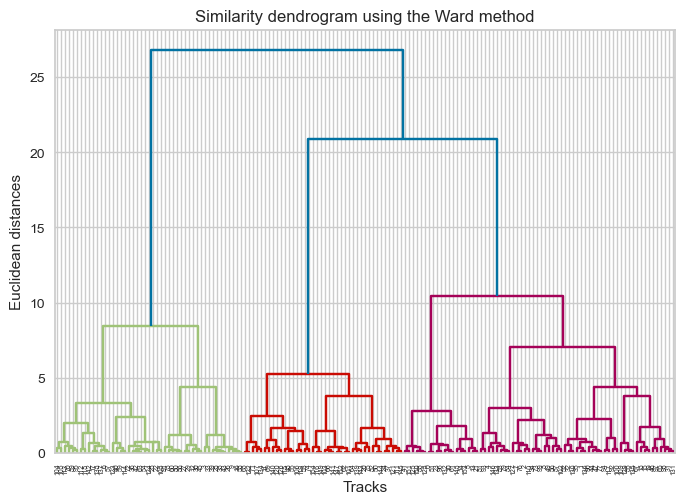

In [168]:
from scipy.cluster.hierarchy import dendrogram, linkage

# performing hierarchical clustering on whole df, after scaling,
# umap dimensionality reduction
linkage_data = linkage(umap_transformed, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Tracks')
plt.ylabel('Euclidean distances')
plt.title('Similarity dendrogram using the Ward method')
plt.savefig("hierarchical_clustering_dendrogram.jpg")
plt.show()

In [169]:
# Ploting the outpu from hierarchical clustering:
from sklearn.cluster import AgglomerativeClustering

# same set used on umap_reducted data
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, 
                                              affinity='euclidean',
                                              linkage = 'ward')

hierarchical_cluster.fit_predict(umap_transformed)
hierarchy_labels = hierarchical_cluster.labels_

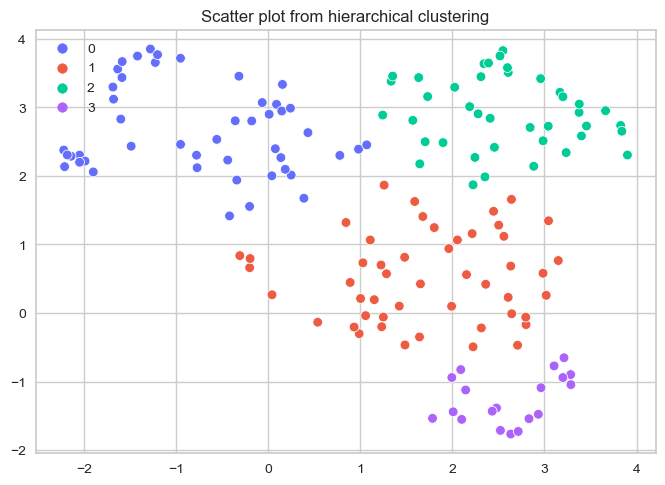

In [170]:
colors_for_hierarchy = ['#636EFA', '#EE5B43', '#00CC96', '#AB63FA']
sns.scatterplot(x = umap_transformed[:,0], y = umap_transformed[:, 1],
                data = umap_transformed, hue = hierarchy_labels, 
                palette = colors_for_hierarchy
               ).set_title('Scatter plot from hierarchical clustering')
plt.legend()
plt.savefig("hierarchical_clustering_scatter.jpg")
plt.show()

In [171]:
# Looking for inside of data after umap reduction and hierarchical clustering 
df_w_hierarchy_labels_scaled = df_scaled.copy()
df_w_hierarchy_labels_scaled['Label'] = hierarchy_labels

In [172]:
# Polar plot of all clusters after hierarchical clustering to show similarities of data
polar_hierarchy=df_w_hierarchy_labels_scaled.groupby('Label').median().reset_index()
polar_hierarchy_after_melt=pd.melt(polar_hierarchy, id_vars=['Label'])

fig_polar_hierarchy = px.line_polar(polar_hierarchy_after_melt, r='value', 
                    theta='variable', color='Label', 
                   line_close=True, height=800, width=1000)
fig_polar_hierarchy.write_image("polar_plot_hierarchy.jpeg")
fig_polar_hierarchy.show()

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [173]:
# Grouping by labels which make groups by cluster
pie_df_hierarchy = df_w_hierarchy_labels_scaled.groupby('Label').size().reset_index()
# naming columns of df to make them nor normal names insted of generated by code
pie_df_hierarchy.columns=['Label', 'value']
fig_pie_hierarchy = px.pie(pie_df_hierarchy, values='value', names='Label', color='Label',
                          title='Population of clusters after hierarchical clustering')
fig_pie_hierarchy.write_image("pie_plot_hierarchy.jpeg")
fig_pie_hierarchy.show()

In [174]:
# Finding out how many observation is in each cluster:
df_w_hierarchy_labels_scaled.groupby(['Label'])['Label'].count()

Label
0    47
1    49
2    40
3    19
Name: Label, dtype: int64

In [175]:
# Cluster participation:

cust0_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==0]
print(f"The number of observation in cluster 0 = {len(cust0_hierarchy)}")
print(f"The observation indexes are:{cust0_hierarchy.index.values}")
print("===========================================\n")
cust1_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==1]
print(f"The number of observation in cluster 1 = {len(cust1_hierarchy)}")
print(f"The observation indexes are:{cust1_hierarchy.index.values}")
print("===========================================\n")
cust2_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==2]
print(f"The number of observation in cluster 2 = {len(cust2_hierarchy)}")
print(f"The observation indexes are:{cust2_hierarchy.index.values}")
print("===========================================\n")
cust3_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==3]
print(f"The number of observation in cluster 3 = {len(cust3_hierarchy)}")
print(f"The observation indexes are:{cust3_hierarchy.index.values}")
print("===========================================\n")

The number of observation in cluster 0 = 47
The observation indexes are:[  3   6   9  12  16  17  22  25  26  27  28  29  30  33  36  38  39  40
  42  43  45  54  57  58  59  60  63  70  72  78  80  86  89  91  95 104
 105 108 112 113 114 118 123 124 137 138 142]

The number of observation in cluster 1 = 49
The observation indexes are:[  1   2   4   7   8  15  18  19  31  32  34  35  44  46  47  49  52  56
  65  67  73  76  77  79  81  83  84  85  87  90  92  93  94  97  98  99
 100 102 109 110 117 127 129 130 131 133 135 136 146]

The number of observation in cluster 2 = 40
The observation indexes are:[ 11  20  24  37  48  50  53  55  62  64  66  68  69  71  74  75  82 101
 103 106 107 111 115 116 119 120 121 122 126 134 139 140 141 143 144 145
 147 149 152 154]

The number of observation in cluster 3 = 19
The observation indexes are:[  0   5  10  13  14  21  23  41  51  61  88  96 125 128 132 148 150 151
 153]



In [66]:
# pair_plot_hierarchy = sns.pairplot(df_w_hierarchy_labels_scaled, hue='Label', height=5, palette = colors_for_hierarchy)

### Extracting spots position for every track

In [220]:
# Prepare data for traces
df_spot_in_trace = raw_data[['LABEL', 'TRACK_START', 'TRACK_STOP', 'TRACK_ID']].copy()
df_only_spots = pd.read_csv(spots_df,
                            encoding='cp1250')
#df_only_spots = pd.read_csv('spots_slabe_s_1_min_nieb_40uE.csv',
#                            encoding='cp1250')

In [221]:
# droping not valuable rows:
df_spot_in_trace.drop(df_spot_in_trace.index[[0,1,2]], inplace = True)
df_spot_in_trace.apply(lambda x: x.str.replace('.',','))
# changing type to float
df_traces_info = pd.DataFrame()
df_traces_info['LABEL'] = df_spot_in_trace['LABEL'].astype('string')
df_traces_info['TRACK_START'] = df_spot_in_trace['TRACK_START'].astype('float')
df_traces_info['TRACK_STOP'] = df_spot_in_trace['TRACK_STOP'].astype('float')
df_traces_info['TRACK_ID'] = df_spot_in_trace['TRACK_ID'].astype('int')
df_traces_info.reset_index(level=None, drop=True, inplace = True)
df_traces_info.head()

C:\Users\Alek\AppData\Local\Temp\ipykernel_1316\3973707517.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



LABEL  TRACK_START  TRACK_STOP  TRACK_ID
0   Track_5          0.0       116.0         5
1   Track_7          0.0       136.0         7
2   Track_8          0.0       135.0         8
3   Track_9          0.0       461.0         9
4  Track_12          0.0       119.0        12

In [178]:
# performing the same operation for the df with spot locations:
df_only_spots.drop(df_only_spots.index[[0,1,2]], inplace = True)
df_only_spots.apply(lambda x: x.str.replace('.',','))
df_spots_info_raw = df_only_spots[['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'FRAME']].copy()
# changeing types of colums data
df_spots_info = pd.DataFrame()
df_spots_info['TRACK_ID'] = df_spots_info_raw['TRACK_ID'].astype('int')
df_spots_info['POSITION_X'] = df_spots_info_raw['POSITION_X'].astype('float')
df_spots_info['POSITION_Y'] = df_spots_info_raw['POSITION_Y'].astype('float')
df_spots_info['POSITION_T'] = df_spots_info_raw['POSITION_T'].astype('float')
df_spots_info['FRAME'] = df_spots_info_raw['FRAME'].astype('int')
df_spots_info.reset_index(level=None, drop=True, inplace = True)
df_spots_info.head()

C:\Users\Alek\AppData\Local\Temp\ipykernel_1316\850530675.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



TRACK_ID  POSITION_X  POSITION_Y  POSITION_T  FRAME
0         5  133.362134  100.874221        19.0     19
1         5  135.779846   97.842606       106.0    106
2         5  133.405479  100.820330        27.0     27
3         5  133.304365   99.367324        31.0     31
4         5  132.367051   97.875516        48.0     48

In [179]:
# Joinning dfs on trackID
df_spots_merged = pd.merge(df_traces_info, df_spots_info, how='right',
                           on='TRACK_ID', suffixes=['', '_'])[['LABEL', 'TRACK_START', 'TRACK_STOP','TRACK_ID','POSITION_X','POSITION_Y', 'POSITION_T', 'FRAME']]
df_spots_merged.head()

LABEL  TRACK_START  TRACK_STOP  TRACK_ID  POSITION_X  POSITION_Y  \
0  Track_5          0.0       116.0         5  133.362134  100.874221   
1  Track_5          0.0       116.0         5  135.779846   97.842606   
2  Track_5          0.0       116.0         5  133.405479  100.820330   
3  Track_5          0.0       116.0         5  133.304365   99.367324   
4  Track_5          0.0       116.0         5  132.367051   97.875516   

   POSITION_T  FRAME  
0        19.0     19  
1       106.0    106  
2        27.0     27  
3        31.0     31  
4        48.0     48

In [180]:
# Sorting on the frame position for each track

gruped_tracks = df_spots_merged.sort_values(['TRACK_ID','POSITION_T'],ascending=True).groupby('TRACK_ID')
sorted_tracks_df = gruped_tracks.apply(lambda x: x)
sorted_tracks_df.head()

LABEL  TRACK_START  TRACK_STOP  TRACK_ID  POSITION_X  POSITION_Y  \
13   Track_5          0.0       116.0         5  133.352149  100.077519   
45   Track_5          0.0       116.0         5  133.351231  100.351170   
72   Track_5          0.0       116.0         5  133.434617  100.449752   
106  Track_5          0.0       116.0         5  133.480496  100.450121   
16   Track_5          0.0       116.0         5  133.476472  100.465244   

     POSITION_T  FRAME  
13          0.0      0  
45          1.0      1  
72          2.0      2  
106         3.0      3  
16          4.0      4

### Spliting data by the first 2 selected clusters information

In [181]:
# getting the list of pandas indexes to get track_id
# we can use cast0 and cast1 variables:
indexes_list_clust_0 = list(cust0.index.values)
indexes_list_clust_1 = list(cust1.index.values)

tracks_IDs = df_dropped_rows['TRACK_ID']

tracks_from_cluster_0 = list()
tracks_from_cluster_1 = list()
# prepering list from only tracks in this cluster by indexes we know prior:
for obj in indexes_list_clust_0:
    tracks_from_cluster_0.append(tracks_IDs[obj])
    
for obj in indexes_list_clust_1:
    tracks_from_cluster_1.append(tracks_IDs[obj])
#print(tracks_from_cluster_0)

In [182]:
# Preparing data for plot and pearsonr test, making frames containg
# only observations from certain cluster:
df_tracks_clust_0 = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_0)]
df_tracks_clust_1 = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_1)]


### Performing Pearson corelation test to check linearity of the tracks vectors between first 2 selcted clusters

In [183]:
# Performing the Pearson correlation on tracks from cluster0 to check 
# if the tracks movement are linear

from scipy.stats import pearsonr

# making list of list to store x_positions and y_postions of movement
# for each track separately
df_track_positions_clust_0 = df_tracks_clust_0[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_1 = df_tracks_clust_1[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_0.head()

# Gruping tracks positions for each cluster:
group_clust_0 = df_track_positions_clust_0.apply(tuple,1).tolist()
group_clust_1 = df_track_positions_clust_1.apply(tuple,1).tolist()

In [184]:
from collections import defaultdict 

def get_tracks_pearson_coef_from_records(groups_df, tracks_list, df_to_save):
    dx = defaultdict(list)
    dy = defaultdict(list)
    for g in groups_df:
        dx[g[0]].append(g[1])
        dy[g[0]].append(g[2])
    
    for i in tracks_list:
        x_positons = dx[float(i)]
        y_postions = dy[float(i)]
        corelation_out = pearsonr(x_positons,y_postions)
        path_label: str
        if 1.0 >= corelation_out[0] >= 0.9:
            path_label = 'Linear'
        elif 0.9 >= corelation_out[0] >= 0.7:
            path_label = 'High positive linear'
        elif 0.7 >= corelation_out[0] >= 0.5:
            path_label = 'Moderate positive linear'
        elif 0.5 >= corelation_out[0] >= 0.3:
            path_label = 'Low positive linear'
        elif 0.3 >= corelation_out[0] >= -0.3:
            path_label = 'Negligible corelation'
        elif -0.3 >= corelation_out[0] >= -0.5:
            path_label = 'Low positive non-linear'
        elif -0.5 >= corelation_out[0] >= -0.7:
            path_label = 'Moderate positive non-linear'
        elif -0.7 >= corelation_out[0] >= -0.9:
            path_label = 'High positive non-linear'
        elif -0.9 >= corelation_out[0] >= -1.0:
            path_laberl = 'Non-linear'
        df_to_save.loc[i]=[i, corelation_out[0], corelation_out[1], path_label]


In [185]:
# Its obligatory to precreate df to store pearson values
df_pearsonr_out_clust_0 = pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_1 = pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])

get_tracks_pearson_coef_from_records(group_clust_0,
                                  tracks_from_cluster_0,
                                  df_pearsonr_out_clust_0)
get_tracks_pearson_coef_from_records(group_clust_1,
                                     tracks_from_cluster_1,
                                    df_pearsonr_out_clust_1)
# Saving data_frames_to file:
df_pearsonr_out_clust_0.to_csv('pearosn_out_clust_0.csv')
df_pearsonr_out_clust_1.to_csv('pearosn_out_clust_1.csv')

### Performing hipotesis testing

In [186]:
# Clearing the data out of observation with p_vlaue greater than 0.05:
df_pearson_clust_0_filtered = df_pearsonr_out_clust_0.loc[df_pearsonr_out_clust_0['P_VALUE'] < 0.05]
df_pearson_clust_1_filtered = df_pearsonr_out_clust_1.loc[df_pearsonr_out_clust_1['P_VALUE'] < 0.05]

In [187]:
# Defining hypothesis:
'''
Null hypothesis - All tracks a cross the clusters are linear

Alternative hypothesis - There are tracks in clusters which are non-linear
'''
# Preparing data for the Welch's t-test testing I choose this test because
# sample differ in size, so they will also have different variances:

from scipy.stats import ttest_ind

group_clust_0 = df_pearson_clust_0_filtered[['PEARSON_COEF']].copy()
group_clust_1 = df_pearson_clust_1_filtered[['PEARSON_COEF']].copy()

# performing t-test:
ttest_ind(group_clust_1['PEARSON_COEF'], group_clust_0['PEARSON_COEF'],
          equal_var=False, alternative = 'greater')
# Pvalue is grater than 0.05 so we accept the null hipothesis. 

Ttest_indResult(statistic=0.001967772996099047, pvalue=0.49921846357835903)

In [188]:
# Performing Mann-Whitney test:
from scipy.stats import mannwhitneyu
# fisrt group shold have grater coefficent values
U1, p = mannwhitneyu(group_clust_1['PEARSON_COEF'],
                    group_clust_0['PEARSON_COEF'], alternative='greater')
print(f'U value: {U1}, pvalue: {p}')

U value: 1732.0, pvalue: 0.5991980003540875


### Extracting the start position to check if this positions inside of cluster differ

In [189]:
# Extracting starting point from tracks in one cluster:
df_with_start_points = sorted_tracks_df[sorted_tracks_df.TRACK_START == sorted_tracks_df.FRAME]
df_with_start_points_cluster_0 = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_0)]
df_with_start_points_cluster_1 = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_1)]

# Adding the labels to the dataframes: 
df_with_start_points_cluster_0.insert(8, 'CLUST_LABEL', 0)
df_with_start_points_cluster_1.insert(8, 'CLUST_LABEL', 1)

# Merging the data frame into one:
frames = [df_with_start_points_cluster_0, df_with_start_points_cluster_1]
df_start_points_both_clusters = pd.concat(frames, copy=True)
#df_start_points_both_clusters.to_csv('df_start_points_both.csv')

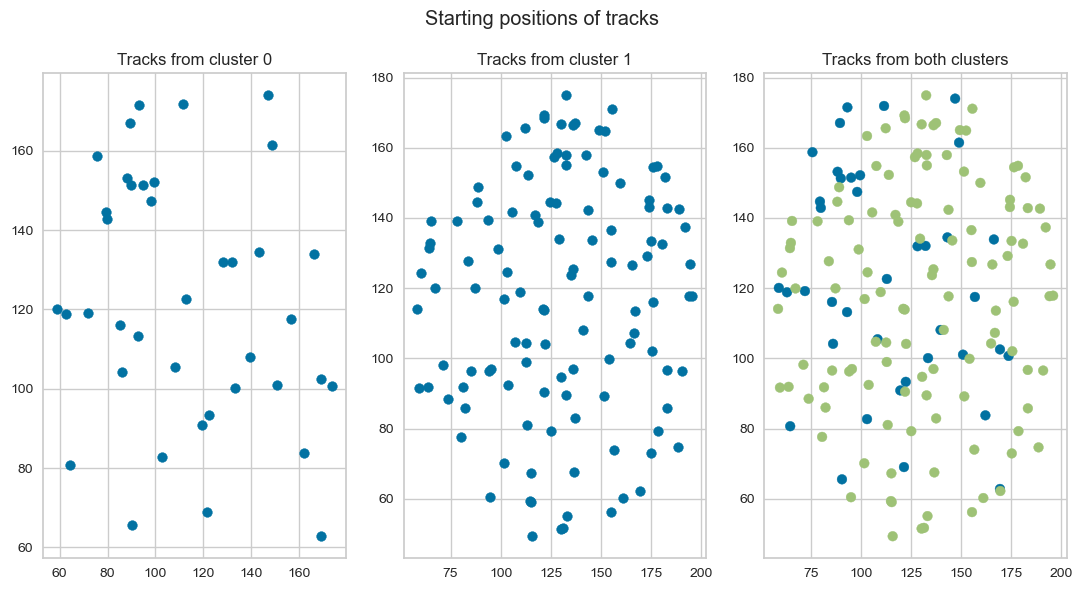

In [190]:
# Ploting points in scatterplot in subplot:
colors = {'0': '#0171A1', '1': '#9EC276'}
fig = plt.figure(figsize = (11,6))
fig.suptitle("Starting positions of tracks")
ax = plt.subplot(131)
ax.set_title("Tracks from cluster 0")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_0)

ax = plt.subplot(132)
ax.set_title("Tracks from cluster 1")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_1)

ax = plt.subplot(133)
ax.set_title("Tracks from both clusters")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
           data = df_start_points_both_clusters,
           c=df_start_points_both_clusters['CLUST_LABEL'].astype(str).map(colors))

fig.tight_layout()
plt.savefig("tracks_startins_positions_2_clusters.jpeg")
plt.show()

### Performing testing within 4 choosen clusters

### Spliting data across 4 clusters

In [191]:
# getting the list of pandas indexes to get track_id
# we can use cast0 and cast1 variables:
indexes_list_clust_0_h = list(cust0_hierarchy.index.values)
indexes_list_clust_1_h= list(cust1_hierarchy.index.values)
indexes_list_clust_2_h= list(cust2_hierarchy.index.values)
indexes_list_clust_3_h= list(cust3_hierarchy.index.values)

tracks_from_cluster_0_h = list()
tracks_from_cluster_1_h = list()
tracks_from_cluster_2_h = list()
tracks_from_cluster_3_h = list()

# prepering list of tracks_IDs from only tracks df for every by
# indexes we know from prior analysis:
def get_list_of_tracks_IDs(indexes_from_cluster, index_list_out, df_with_tracks_IDs):
    for obj in indexes_from_cluster:
        index_list_out.append(df_with_tracks_IDs[obj])

In [192]:
# performing for all clusters:
get_list_of_tracks_IDs(indexes_list_clust_0_h, tracks_from_cluster_0_h,
                                               tracks_IDs)
get_list_of_tracks_IDs(indexes_list_clust_1_h, tracks_from_cluster_1_h,
                                               tracks_IDs)
get_list_of_tracks_IDs(indexes_list_clust_2_h, tracks_from_cluster_2_h,
                                               tracks_IDs)
get_list_of_tracks_IDs(indexes_list_clust_3_h, tracks_from_cluster_3_h,
                                               tracks_IDs)

In [193]:
# Preparing data for plot and pearsonr test, making frames containg
# only observations from certain cluster:
df_tracks_clust_0_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_0_h)]
df_tracks_clust_1_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_1_h)]
df_tracks_clust_2_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_2_h)]
df_tracks_clust_3_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_3_h)]

### Performing Pearson corelation test to check linearity of the tracks vectors between 4 selcted clusters from hierarchical clustering:

In [194]:
# Performing the Pearson correlation on tracks from cluster0 to check 
# if the tracks movement are linear

# making list of list to store x_positions and y_postions of movement
# for each track separately
df_track_positions_clust_0_h = df_tracks_clust_0_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_1_h= df_tracks_clust_1_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_2_h= df_tracks_clust_2_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_3_h= df_tracks_clust_3_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()

# Gruping tracks positions for each cluster:
group_clust_0_h = df_track_positions_clust_0_h.apply(tuple,1).tolist()
group_clust_1_h = df_track_positions_clust_1_h.apply(tuple,1).tolist()
group_clust_2_h = df_track_positions_clust_2_h.apply(tuple,1).tolist()
group_clust_3_h = df_track_positions_clust_3_h.apply(tuple,1).tolist()

In [195]:
# Its obligatory to precreate df to store pearson values
df_pearsonr_out_clust_0_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_1_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_2_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_3_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])

get_tracks_pearson_coef_from_records(group_clust_0_h,
                                  tracks_from_cluster_0_h,
                                  df_pearsonr_out_clust_0_h)
get_tracks_pearson_coef_from_records(group_clust_1_h,
                                     tracks_from_cluster_1_h,
                                    df_pearsonr_out_clust_1_h)
get_tracks_pearson_coef_from_records(group_clust_2_h,
                                     tracks_from_cluster_2_h,
                                    df_pearsonr_out_clust_2_h)
get_tracks_pearson_coef_from_records(group_clust_3_h,
                                     tracks_from_cluster_3_h,
                                    df_pearsonr_out_clust_3_h)
# Saving data_frames_to file:
df_pearsonr_out_clust_0_h.to_csv('pearosn_out_clust_0_h.csv')
df_pearsonr_out_clust_1_h.to_csv('pearosn_out_clust_1_h.csv')
df_pearsonr_out_clust_2_h.to_csv('pearosn_out_clust_2_h.csv')
df_pearsonr_out_clust_3_h.to_csv('pearosn_out_clust_3_h.csv')

### Performing pairwise.t.test 

In [196]:
# Clearing the data out of observation with p_vlaue greater than 0.05:
df_pearson_clust_0_h_filtered = df_pearsonr_out_clust_0_h.loc[df_pearsonr_out_clust_0_h['P_VALUE'] < 0.05]
df_pearson_clust_1_h_filtered = df_pearsonr_out_clust_1_h.loc[df_pearsonr_out_clust_1_h['P_VALUE'] < 0.05]
df_pearson_clust_2_h_filtered = df_pearsonr_out_clust_2_h.loc[df_pearsonr_out_clust_2_h['P_VALUE'] < 0.05]
df_pearson_clust_3_h_filtered = df_pearsonr_out_clust_3_h.loc[df_pearsonr_out_clust_3_h['P_VALUE'] < 0.05]

In [197]:
# Concatenating data to singular dataframe
df_pearson_clust_0_h_filtered.insert(4, 'CLUST_LABEL', 0)
df_pearson_clust_1_h_filtered.insert(4, 'CLUST_LABEL', 1)
df_pearson_clust_2_h_filtered.insert(4, 'CLUST_LABEL', 2)
df_pearson_clust_3_h_filtered.insert(4, 'CLUST_LABEL', 3)

# Merging the data frame into one:
frames_h_pearson = [df_pearson_clust_0_h_filtered,
                   df_pearson_clust_1_h_filtered,
                   df_pearson_clust_2_h_filtered,
                   df_pearson_clust_3_h_filtered]
df_four_cluster_pearson = pd.concat(frames_h_pearson, copy=True)

In [198]:
df_four_cluster_pearson.head()

TRACK_ID  PEARSON_COEF        P_VALUE            PATH_LINEARITY  \
9         9     -0.400066   3.478234e-19   Low positive non-linear   
16       16      0.665193   1.221525e-25  Moderate positive linear   
24       24      0.665803   2.453048e-65  Moderate positive linear   
30       30      0.798703  6.174985e-112      High positive linear   
39       39      0.581724   1.301750e-46  Moderate positive linear   

    CLUST_LABEL  
9             0  
16            0  
24            0  
30            0  
39            0

In [199]:
# performing pairwise ttest from pingouin library
import pingouin as pg
'''
https://pingouin-stats.org/generated/pingouin.pairwise_ttests.html
'''
pg.pairwise_tests(dv='PEARSON_COEF', between='CLUST_LABEL', data=df_four_cluster_pearson)

Contrast  A  B  Paired  Parametric         T        dof alternative  \
0  CLUST_LABEL  0  1   False        True -0.143655  82.000000   two-sided   
1  CLUST_LABEL  0  2   False        True  0.367066  72.880928   two-sided   
2  CLUST_LABEL  0  3   False        True -0.934828  31.507561   two-sided   
3  CLUST_LABEL  1  2   False        True  0.548227  72.571021   two-sided   
4  CLUST_LABEL  1  3   False        True -0.857900  28.482727   two-sided   
5  CLUST_LABEL  2  3   False        True -1.245500  27.182208   two-sided   

      p-unc   BF10    hedges  
0  0.886125   0.23 -0.031061  
1  0.714633  0.255  0.081698  
2  0.356987  0.403 -0.262621  
3  0.585218  0.274  0.123691  
4  0.398110  0.381 -0.252780  
5  0.223578  0.544 -0.393481

### Extracting the start position to check if this positions inside 4 clusters differ

In [200]:
# Extracting starting point from tracks in one cluster:
df_with_start_points_cluster_0_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_0_h)]
df_with_start_points_cluster_1_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_1_h)]
df_with_start_points_cluster_2_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_2_h)]
df_with_start_points_cluster_3_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_3_h)]

# Adding the labels to the dataframes: 
df_with_start_points_cluster_0_h.insert(8, 'CLUST_LABEL', 0)
df_with_start_points_cluster_1_h.insert(8, 'CLUST_LABEL', 1)
df_with_start_points_cluster_2_h.insert(8, 'CLUST_LABEL', 2)
df_with_start_points_cluster_3_h.insert(8, 'CLUST_LABEL', 3)

# Merging the data frame into one:
frames_h = [df_with_start_points_cluster_0_h, df_with_start_points_cluster_1_h,
           df_with_start_points_cluster_2_h, df_with_start_points_cluster_3_h]
df_start_points_four_clusters = pd.concat(frames_h, copy=True)
#df_start_points_four_clusters.to_csv('df_start_points_four_clust.csv')

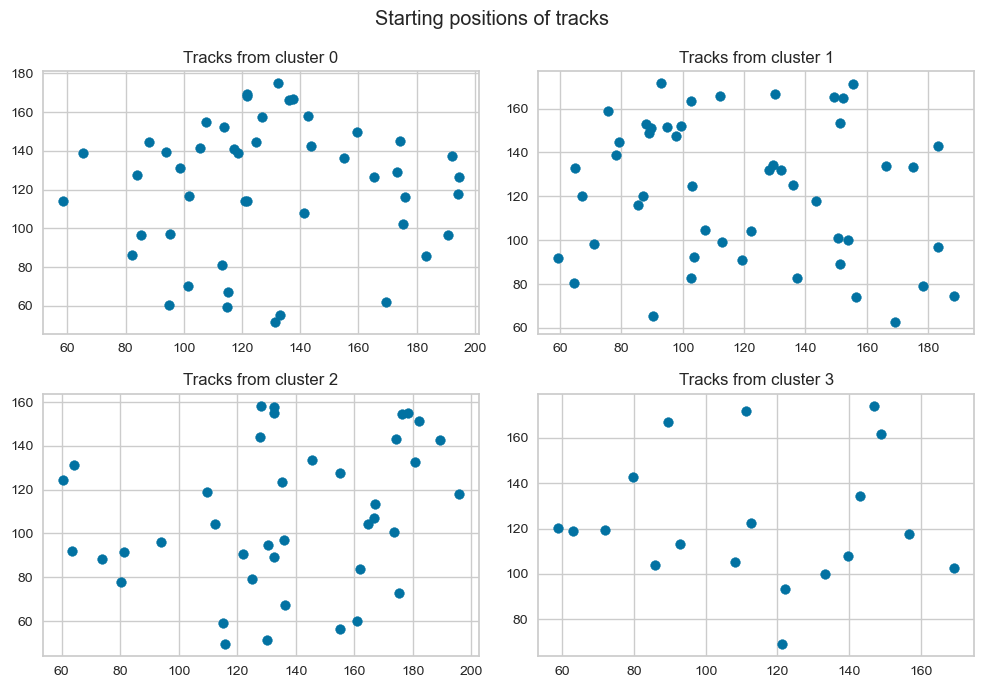

In [201]:
# Ploting points in scatterplot in subplot:
fig = plt.figure(figsize = (10,7))
fig.suptitle("Starting positions of tracks")
ax = plt.subplot(221)
ax.set_title("Tracks from cluster 0")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_0_h)

ax = plt.subplot(222)
ax.set_title("Tracks from cluster 1")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_1_h)

ax = plt.subplot(223)
ax.set_title("Tracks from cluster 2")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
           data = df_with_start_points_cluster_2_h)

ax = plt.subplot(224)
ax.set_title("Tracks from cluster 3")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
           data = df_with_start_points_cluster_3_h)

fig.tight_layout()
plt.savefig("tracks_starting_positions_4_clusters.jpeg")
plt.show()

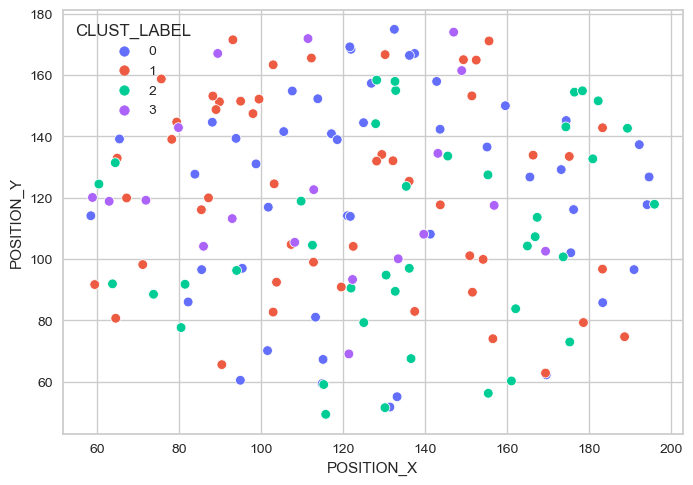

In [202]:
# Plotting all clusters
colors_dict = {0: '#636EFA', 1: '#EE5B43', 2: '#00CC96', 3: '#AB63FA'}
sns.scatterplot(x = 'POSITION_X', y = 'POSITION_Y',data = df_start_points_four_clusters, hue = 'CLUST_LABEL', palette = colors_dict)
plt.savefig("tracks_starting_positions_compare.jpeg")

### Conducting a normality test to prepare data for ANOVA

In [203]:
# The data to be checked will describe the paths and their characteristics 
# in order to identify which of the characteristics has the most information
# and can be used to distinguish the groups

# so for this prepartion we will only need the splited data frames with 
# tracks IDs and they features
df_w_hierarchy_labels_scaled.head()

# Gouping data by the label:

hierarchy_grouped_by_label = df_w_hierarchy_labels_scaled.groupby('Label')

# Checking if the dataframe is grouped as we want:
counts = hierarchy_grouped_by_label.size()

print(counts)

Label
0    47
1    49
2    40
3    19
dtype: int64


In [204]:
# Spliting grouped into different dataframes:
clust_0_h = hierarchy_grouped_by_label.get_group(0)
clust_1_h = hierarchy_grouped_by_label.get_group(1)
clust_2_h = hierarchy_grouped_by_label.get_group(2)
clust_3_h = hierarchy_grouped_by_label.get_group(3)

clust_0_h.head()

TRACK_MIN_SPEED  TRACK_MEDIAN_SPEED  TRACK_STD_SPEED  \
3         -1.122686           -1.548469        -1.585594   
6         -0.089904           -0.769281        -0.510005   
9         -0.904019           -1.385996        -1.248492   
12        -0.499923           -0.867022        -1.195280   
16        -1.016818           -1.889298        -0.990714   

    TOTAL_DISTANCE_TRAVELED  CONFINEMENT_RATIO  MEAN_STRAIGHT_LINE_SPEED  \
3                  1.618733          -0.705448                 -0.934098   
6                 -0.233472          -0.418554                 -0.529772   
9                  2.210711          -0.088197                 -0.446191   
12                 2.717128          -0.667139                 -0.799639   
16                 2.070374          -0.254780                 -0.597089   

    LINEARITY_OF_FORWARD_PROGRESSION  MEAN_DIRECTIONAL_CHANGE_RATE  Label  
3                          -0.705448                     -0.152132      0  
6                          -0.418554                      0.630092      0  
9                          -0.088197                     -0.571302      0  
12                         -0.667139                      0.887479      0  
16                         -0.254780                     -1.452580      0

In [205]:
from scipy.stats import shapiro
from scipy.stats import fligner
from scipy.stats import f_oneway
from scipy.stats import kruskal
import scikit_posthocs as sp

# Checking the normality of data within groups, 
# and all the features within groups:
feature_list = ["TRACK_MIN_SPEED","TRACK_MEDIAN_SPEED","TRACK_STD_SPEED",
                "TOTAL_DISTANCE_TRAVELED", "CONFINEMENT_RATIO", 
                "MEAN_STRAIGHT_LINE_SPEED", "LINEARITY_OF_FORWARD_PROGRESSION", 
                "MEAN_DIRECTIONAL_CHANGE_RATE"]
groups = [clust_0_h, clust_1_h, clust_2_h, clust_3_h]


def check_all_normality_of_group(group_to_check, list_of_features):
    for feature in list_of_features:
        stat, p = shapiro(group_to_check[feature])
        print(f"{feature}: {p}  | {'Not-Normal' if p < 0.05 else 'Normal'}")
    
    print("\n")
 

def check_equality_of_variance(groups, feature_list):  
    alpha = 0.05

    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            for feature in feature_list:
                w, p_val = fligner(groups[i][feature], groups[j][feature])
                if p_val < alpha:
                    print(f"The variances in group {i} and group {j}: ")
                    print(f"for feature {feature} are not equal (p = {p_val}) \n")
                else:
                    print(f"The variances in group {i} and group {j}: ")
                    print(f"for feature {feature} are equal (p = {p_val}) \n")
  

def perform_ANOVA(group0, group1, group2, group3, feature_list):
    for feature in feature_list:
        f_val, p_val = f_oneway(group0[feature], group1[feature], group2[feature], group3[feature])
        if p_val < alpha:
            print(f"Feature {feature} has significant difference among groups (p = {p_val})\n")
        else:
            print(f"Feature {feature} does not have significant difference among groups (p = {p_val})\n")
            
            
def perform_Kruskal(group0, group1, group2, group3, feature_list):
    dict_p = {}
    for feature in feature_list:
        statistics, p_val = kruskal(group0[feature], group1[feature], group2[feature], group3[feature])
        dict_p[feature] = p_val
        if p_val < alpha:
            print(f"Feature {feature} has significant difference among groups (p = {p_val})\n")
        else:
            print(f"Feature {feature} does not have significant difference among groups (p = {p_val})\n")
    return dict_p
        


In [206]:
# Checking the function:
print("Clust_0")
check_all_normality_of_group(clust_0_h, feature_list)
print("Clust_1")
check_all_normality_of_group(clust_1_h, feature_list)
print("Clust_2")
check_all_normality_of_group(clust_2_h, feature_list)
print("Clust_3")
check_all_normality_of_group(clust_3_h, feature_list)
print("Perforimng the variance equality test (Fligner test): ")
check_equality_of_variance(groups, feature_list)

Clust_0
TRACK_MIN_SPEED: 4.929945498588495e-05  | Not-Normal
TRACK_MEDIAN_SPEED: 0.6227694153785706  | Normal
TRACK_STD_SPEED: 0.6955363750457764  | Normal
TOTAL_DISTANCE_TRAVELED: 0.0002603894972708076  | Not-Normal
CONFINEMENT_RATIO: 0.024613918736577034  | Not-Normal
MEAN_STRAIGHT_LINE_SPEED: 0.02416013926267624  | Not-Normal
LINEARITY_OF_FORWARD_PROGRESSION: 0.024613918736577034  | Not-Normal
MEAN_DIRECTIONAL_CHANGE_RATE: 0.5021992921829224  | Normal


Clust_1
TRACK_MIN_SPEED: 0.19365811347961426  | Normal
TRACK_MEDIAN_SPEED: 0.009852176532149315  | Not-Normal
TRACK_STD_SPEED: 0.03379007801413536  | Not-Normal
TOTAL_DISTANCE_TRAVELED: 0.01298622228205204  | Not-Normal
CONFINEMENT_RATIO: 0.8227735161781311  | Normal
MEAN_STRAIGHT_LINE_SPEED: 0.19935934245586395  | Normal
LINEARITY_OF_FORWARD_PROGRESSION: 0.8227735161781311  | Normal
MEAN_DIRECTIONAL_CHANGE_RATE: 0.10698727518320084  | Normal


Clust_2
TRACK_MIN_SPEED: 0.10865799337625504  | Normal
TRACK_MEDIAN_SPEED: 0.0042691822163

In [207]:
perform_ANOVA(clust_0_h, clust_1_h, clust_2_h, clust_3_h, feature_list)

Feature TRACK_MIN_SPEED has significant difference among groups (p = 2.677222544780825e-16)

Feature TRACK_MEDIAN_SPEED has significant difference among groups (p = 3.839750327203047e-15)

Feature TRACK_STD_SPEED has significant difference among groups (p = 6.335139832746673e-16)

Feature TOTAL_DISTANCE_TRAVELED has significant difference among groups (p = 4.114418658161991e-14)

Feature CONFINEMENT_RATIO has significant difference among groups (p = 1.8163303026511181e-41)

Feature MEAN_STRAIGHT_LINE_SPEED has significant difference among groups (p = 2.194984271152294e-36)

Feature LINEARITY_OF_FORWARD_PROGRESSION has significant difference among groups (p = 1.81633030265128e-41)

Feature MEAN_DIRECTIONAL_CHANGE_RATE has significant difference among groups (p = 5.170355381829857e-16)



In [208]:
res = perform_Kruskal(clust_0_h, clust_1_h, clust_2_h, clust_3_h, feature_list)
print(res)

Feature TRACK_MIN_SPEED has significant difference among groups (p = 3.40320821971192e-13)

Feature TRACK_MEDIAN_SPEED has significant difference among groups (p = 1.1226592533554967e-13)

Feature TRACK_STD_SPEED has significant difference among groups (p = 3.2365169046079683e-13)

Feature TOTAL_DISTANCE_TRAVELED has significant difference among groups (p = 1.0354124226880238e-07)

Feature CONFINEMENT_RATIO has significant difference among groups (p = 1.2449977094762923e-19)

Feature MEAN_STRAIGHT_LINE_SPEED has significant difference among groups (p = 1.6039390482156013e-20)

Feature LINEARITY_OF_FORWARD_PROGRESSION has significant difference among groups (p = 1.2449977094762923e-19)

Feature MEAN_DIRECTIONAL_CHANGE_RATE has significant difference among groups (p = 1.5574953191492542e-11)

{'TRACK_MIN_SPEED': 3.40320821971192e-13, 'TRACK_MEDIAN_SPEED': 1.1226592533554967e-13, 'TRACK_STD_SPEED': 3.2365169046079683e-13, 'TOTAL_DISTANCE_TRAVELED': 1.0354124226880238e-07, 'CONFINEMENT_RAT

In [209]:
# Performing posthoc Dunn test:

# combining data from 4 df into single array:
clust_data = pd.concat([clust_0_h, clust_1_h, clust_2_h, clust_3_h], ignore_index=True)

# creating group labels:
clust_data['cluster'] = clust_data['Label'].map({0: 'cluster_0', 1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})

def perform_posthoc_dunn(merged_data, feature_list):
    dict_p = {}
    for feature in feature_list:
        posthoc_results = sp.posthoc_dunn(merged_data, val_col=feature, group_col='cluster')
        dict_p[feature] = posthoc_results
        print(f"DIfferences in groups according to {feature}: ")
        print(f"{posthoc_results} \n")
        
    return dict_p

In [210]:
print("The p-value matrix shows the p-values for all possible pairwise comparisons, where a p-value of less than 0.05 is considered to be statistically significant and indicates that there are differences between the groups. \n")
res_dunn = perform_posthoc_dunn(clust_data, feature_list)
res_dunn

The p-value matrix shows the p-values for all possible pairwise comparisons, where a p-value of less than 0.05 is considered to be statistically significant and indicates that there are differences between the groups. 

DIfferences in groups according to TRACK_MIN_SPEED: 
              cluster_0  cluster_1     cluster_2  cluster_3
cluster_0  1.000000e+00   0.000004  2.254419e-14   0.063448
cluster_1  3.746998e-06   1.000000  1.050603e-03   0.103758
cluster_2  2.254419e-14   0.001051  1.000000e+00   0.000044
cluster_3  6.344804e-02   0.103758  4.426608e-05   1.000000 

DIfferences in groups according to TRACK_MEDIAN_SPEED: 
              cluster_0  cluster_1     cluster_2  cluster_3
cluster_0  1.000000e+00   0.000054  2.480369e-15   0.028042
cluster_1  5.440970e-05   1.000000  3.737968e-05   0.401374
cluster_2  2.480369e-15   0.000037  1.000000e+00   0.000073
cluster_3  2.804187e-02   0.401374  7.268401e-05   1.000000 

DIfferences in groups according to TRACK_STD_SPEED: 
              

{'TRACK_MIN_SPEED':               cluster_0  cluster_1     cluster_2  cluster_3
 cluster_0  1.000000e+00   0.000004  2.254419e-14   0.063448
 cluster_1  3.746998e-06   1.000000  1.050603e-03   0.103758
 cluster_2  2.254419e-14   0.001051  1.000000e+00   0.000044
 cluster_3  6.344804e-02   0.103758  4.426608e-05   1.000000,
 'TRACK_MEDIAN_SPEED':               cluster_0  cluster_1     cluster_2  cluster_3
 cluster_0  1.000000e+00   0.000054  2.480369e-15   0.028042
 cluster_1  5.440970e-05   1.000000  3.737968e-05   0.401374
 cluster_2  2.480369e-15   0.000037  1.000000e+00   0.000073
 cluster_3  2.804187e-02   0.401374  7.268401e-05   1.000000,
 'TRACK_STD_SPEED':               cluster_0  cluster_1     cluster_2  cluster_3
 cluster_0  1.000000e+00   0.000045  5.483659e-15   0.005272
 cluster_1  4.516706e-05   1.000000  6.857597e-05   0.783111
 cluster_2  5.483659e-15   0.000069  1.000000e+00   0.000927
 cluster_3  5.271714e-03   0.783111  9.269705e-04   1.000000,
 'TOTAL_DISTANCE_TRAVE

### Visualization of statistical test within the groups

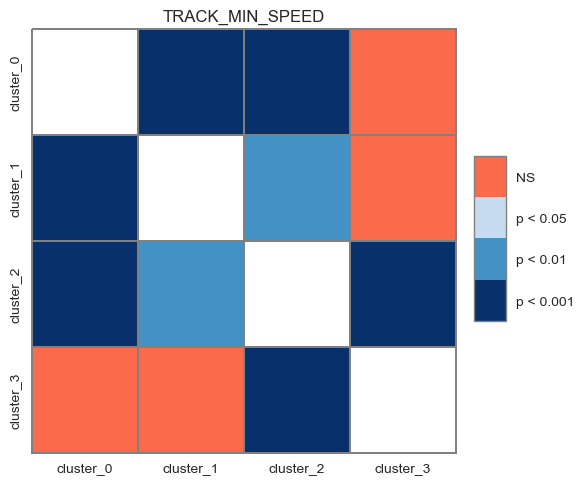

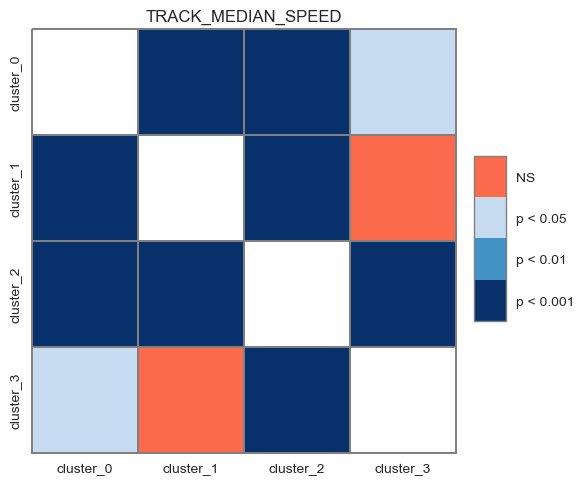

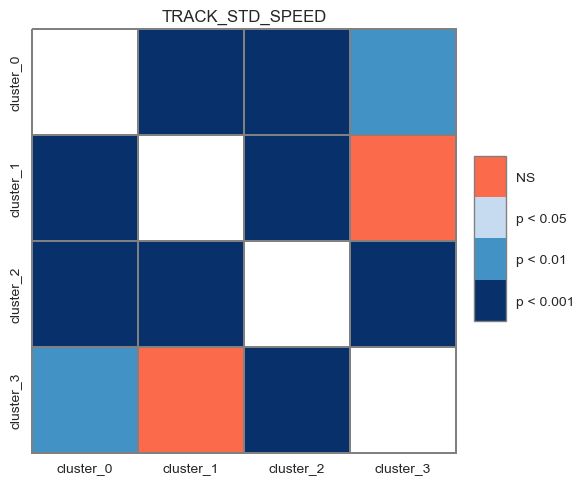

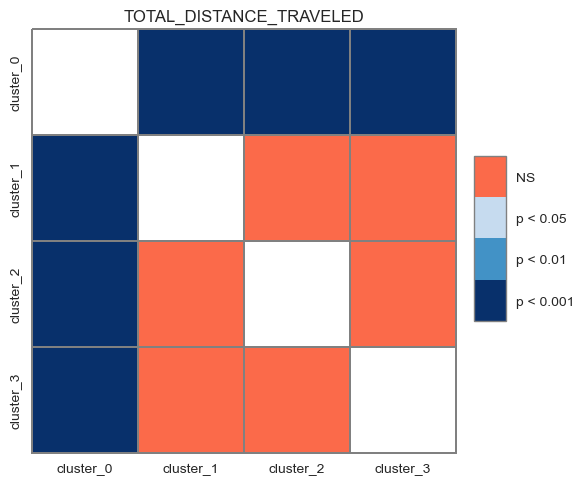

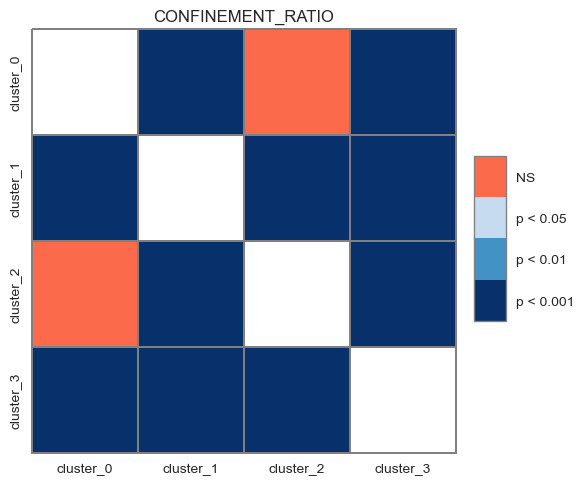

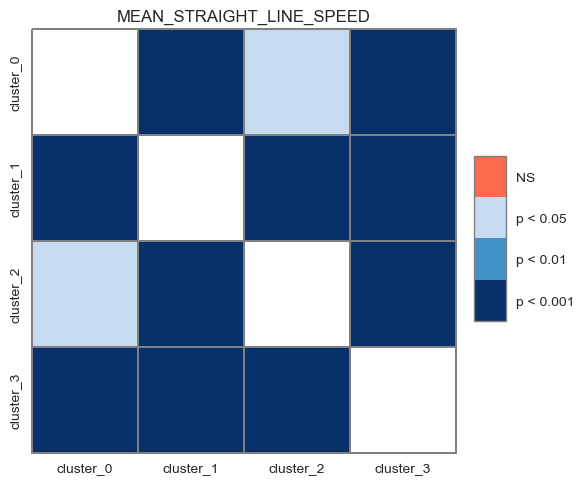

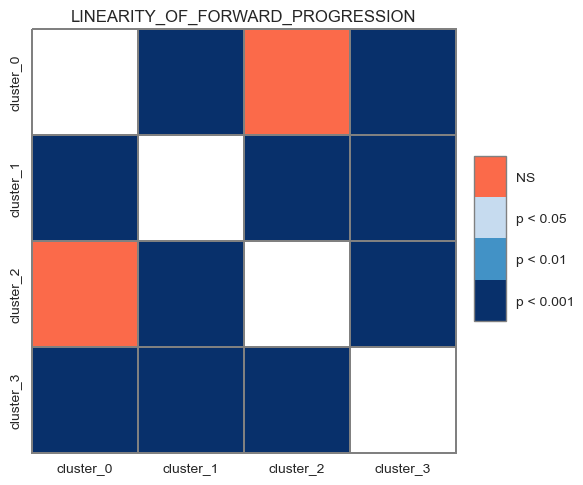

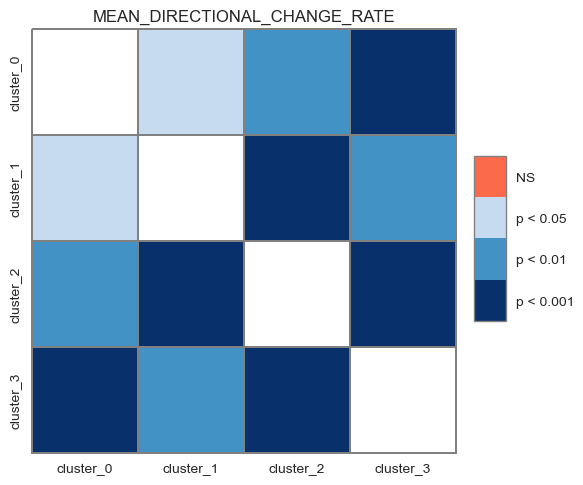

<Figure size 800x550 with 0 Axes>

In [211]:
# Perforimng the heatmap for dune results:
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False,
                'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

for feature, matrix in res_dunn.items():
    px, cbar = sp.sign_plot(matrix, **heatmap_args)
    px.set_title(feature)
    plt.figure()
    px.figure.savefig(f"{feature}_dunn_heatmap.png")
    
plt.show()
    

In [212]:
clust_data.head()
clust_data
clust_data.to_csv("clust_merged.csv")

In [213]:
#Creating data_frame for all dunn test results:
track_min_speed_df = pd.DataFrame.from_dict(res_dunn["TRACK_MIN_SPEED"])
track_median_speed_df = pd.DataFrame.from_dict(res_dunn["TRACK_MEDIAN_SPEED"])
track_std_speed_df = pd.DataFrame.from_dict(res_dunn["TRACK_STD_SPEED"])
total_distance_df = pd.DataFrame.from_dict(res_dunn["TOTAL_DISTANCE_TRAVELED"])
confinement_ratio_df = pd.DataFrame.from_dict(res_dunn["CONFINEMENT_RATIO"])
mean_straight_df = pd.DataFrame.from_dict(res_dunn["MEAN_STRAIGHT_LINE_SPEED"])
linearity_df = pd.DataFrame.from_dict(res_dunn["LINEARITY_OF_FORWARD_PROGRESSION"])
mean_directional_df = pd.DataFrame.from_dict(res_dunn["MEAN_DIRECTIONAL_CHANGE_RATE"])

dfs_list = [track_min_speed_df, track_median_speed_df, track_std_speed_df,
           total_distance_df, confinement_ratio_df, mean_straight_df, 
           linearity_df, mean_directional_df]

molten_dfs_list = []

# clearing the p_values dataframes:
remove = np.tril(np.ones(track_min_speed_df.shape), k=0).astype("bool")
track_min_speed_df[remove] = np.nan

molten_df = track_min_speed_df.melt(ignore_index=False).reset_index().dropna()
molten_df

def preparing_dfs_with_p_value_to_visualize(dfs_list, molten_dfs_list):
    for df in dfs_list:
        remove = np.tril(np.ones(df.shape), k=0).astype("bool")
        df[remove] = np.nan
        
        molten_df = df.melt(ignore_index=False).reset_index().dropna()
        molten_dfs_list.append(molten_df)
    

In [214]:
# Calling the preparation funciton:
preparing_dfs_with_p_value_to_visualize(dfs_list, molten_dfs_list)

In [215]:
from statannotations.Annotator import Annotator
# function for making boxplots with annotations:

clusters = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]

def draw_box_plots_with_stat_annotations(data_merged, feature_list, molten_dfs_list,
                                         cluster_names_list):
    for i in range(len(feature_list)):
        temp = feature_list[i]
        ax = sns.boxplot(data = data_merged, x = 'cluster', 
                         y = temp,
                         order = cluster_names_list)
        ax.set_title(f"{feature_list[i]}")
        # creating pairs and extracting p_values for annotator
        pairs = [(k[1]["index"], k[1]["variable"]) for k in molten_dfs_list[i].iterrows()]
        p_values = [k[1]["value"] for k in molten_dfs_list[i].iterrows()]
        
        annotator = Annotator(
            ax, pairs, data=data_merged, x='cluster', y=feature_list[i], order=cluster_names_list
            )
        annotator.configure(text_format="star", loc="inside")
        print(F"{feature_list[i]}")
        annotator.set_pvalues_and_annotate(p_values)

        plt.tight_layout()
        plt.figure()
        ax.figure.savefig(f"{feature_list[i]}_box_plot_with_dunn.png")
        


TRACK_MIN_SPEED
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

cluster_0 vs. cluster_1: Custom statistical test, P_val:3.747e-06
cluster_1 vs. cluster_2: Custom statistical test, P_val:1.051e-03
cluster_2 vs. cluster_3: Custom statistical test, P_val:4.427e-05
cluster_0 vs. cluster_2: Custom statistical test, P_val:2.254e-14
cluster_1 vs. cluster_3: Custom statistical test, P_val:1.038e-01
cluster_0 vs. cluster_3: Custom statistical test, P_val:6.345e-02
TRACK_MEDIAN_SPEED
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

cluster_0 vs. cluster_1: Custom statistical test, P_val:5.441e-05
cluster_1 vs. cluster_2: Custom statistical test, P_val:3.738e-05
cluster_2 vs. cluster_3: Custom statistical test, P_val:7.268e-05
cluster_0

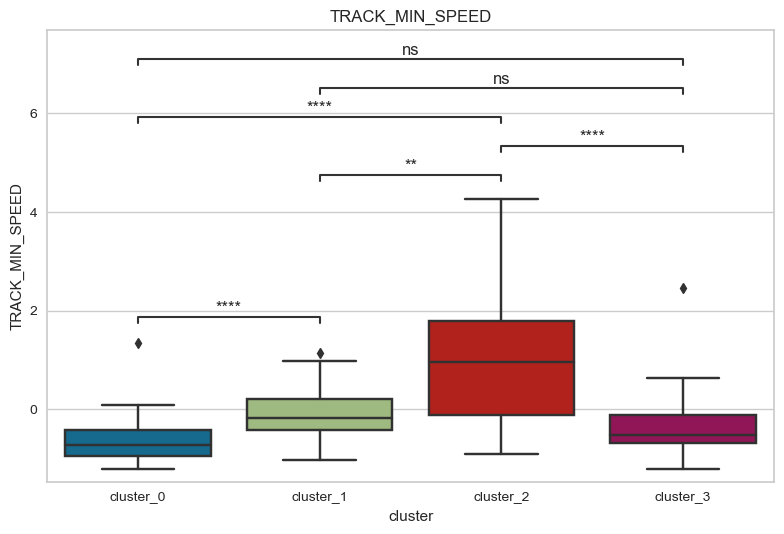

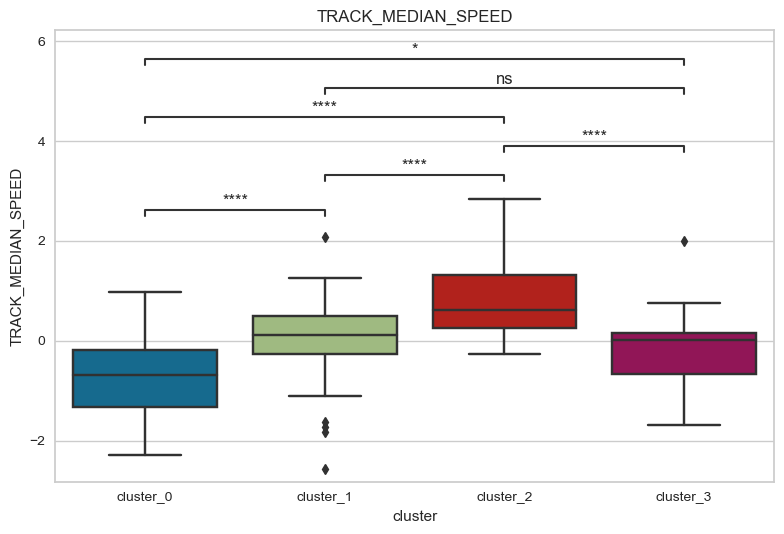

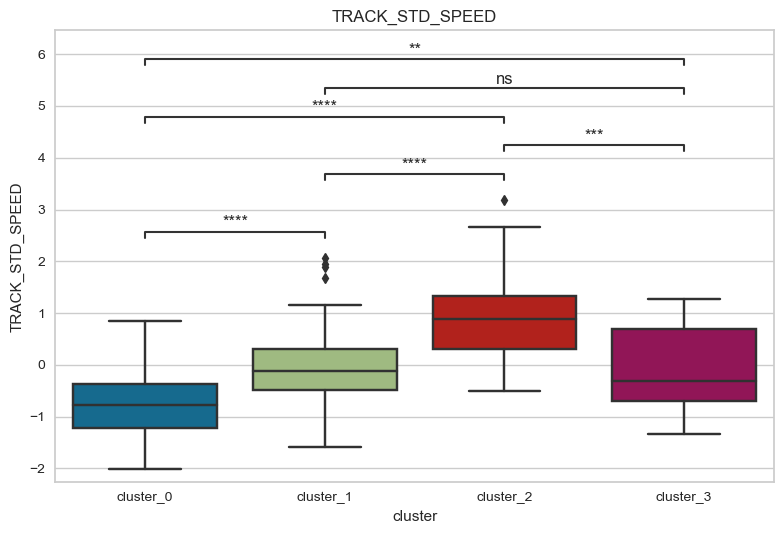

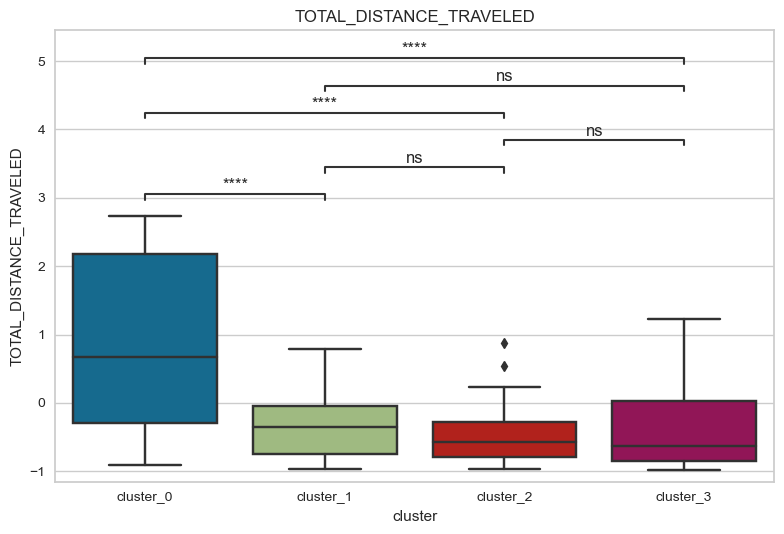

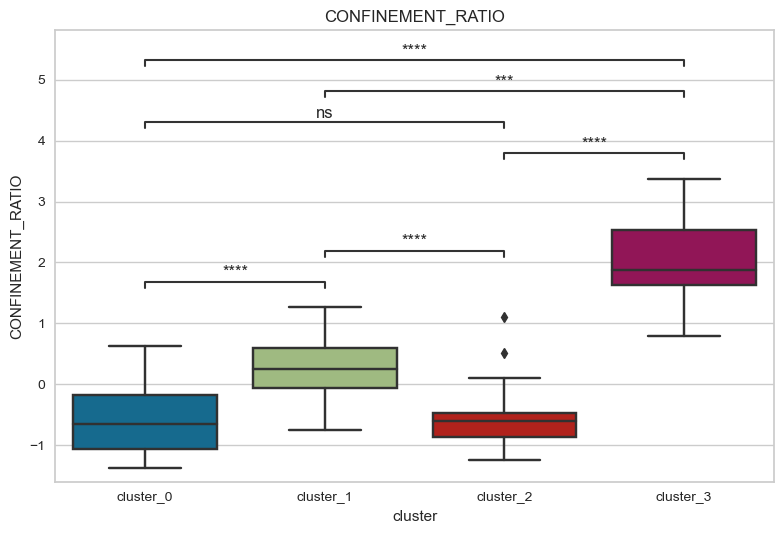

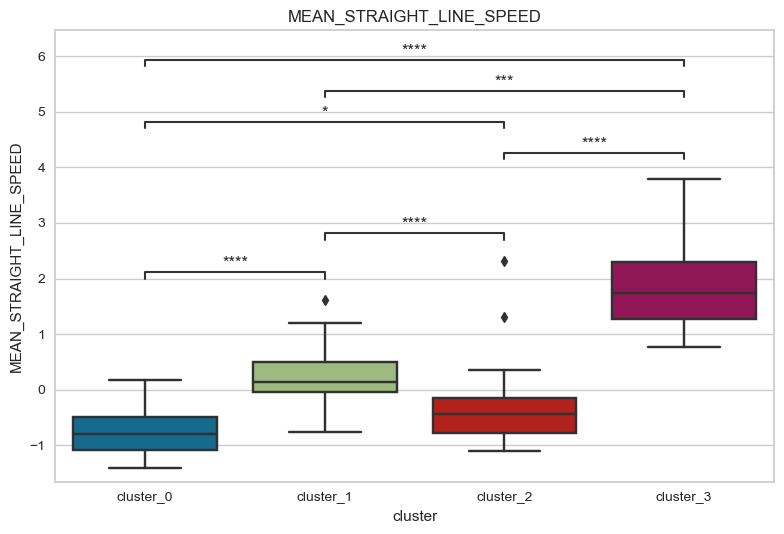

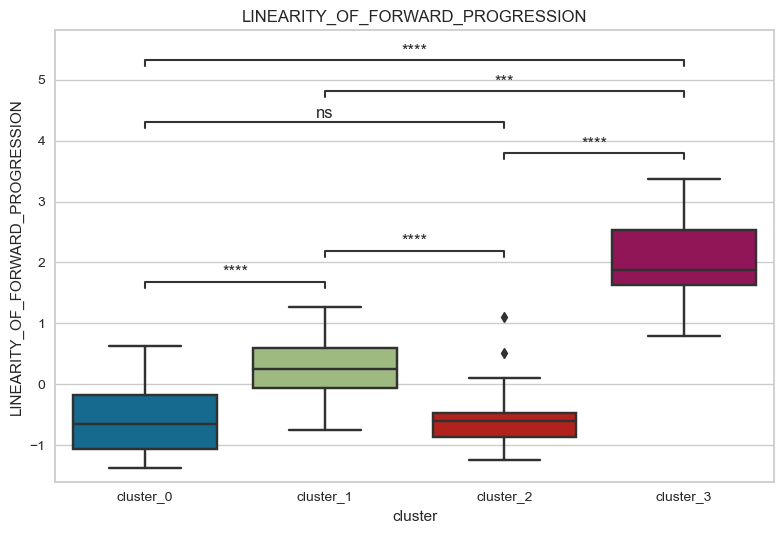

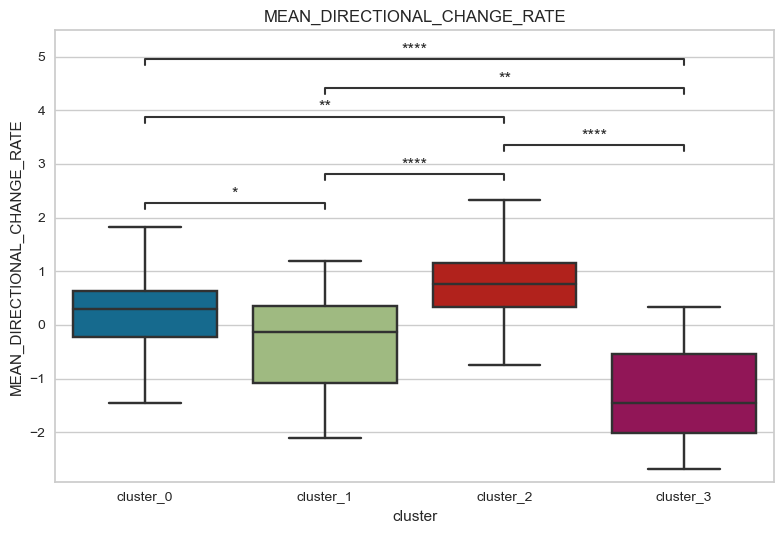

<Figure size 800x550 with 0 Axes>

In [216]:
draw_box_plots_with_stat_annotations(clust_data, feature_list, molten_dfs_list, clusters)

In [108]:
# Performing creating graph with significance:
#from statannotations.Annotator import Annotator

#clusters = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]

#ax = sns.boxplot(data = clust_data, x = 'cluster', y = 'TRACK_MEDIAN_SPEED', order = clusters)

# creating pairs and extracting p_values for annotator
#pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_dfs_list[1].iterrows()]
#p_values = [i[1]["value"] for i in molten_dfs_list[1].iterrows()]

#annotator = Annotator(
#    ax, pairs, data=clust_data, x='cluster', y=feature_list[1], order=clusters
#)
#annotator.configure(text_format="star", loc="inside")
#annotator.set_pvalues_and_annotate(p_values)
#
#plt.tight_layout()
#


In [109]:
clust_data.head()

TRACK_MIN_SPEED  TRACK_MEDIAN_SPEED  TRACK_STD_SPEED  \
0         0.199467            2.330220         2.093290   
1         1.119190           -0.378039        -0.803749   
2         2.132421            0.809038        -0.010226   
3         1.582322           -0.203032         0.909896   
4         3.674775            1.248020         0.825358   

   TOTAL_DISTANCE_TRAVELED  CONFINEMENT_RATIO  MEAN_STRAIGHT_LINE_SPEED  \
0                -1.099937          -0.479028                  0.431688   
1                -0.445610          -1.225252                 -1.319907   
2                -0.471219          -0.998906                 -0.846143   
3                -0.801675          -0.174293                 -0.010777   
4                -1.028728          -1.125152                 -0.847337   

   LINEARITY_OF_FORWARD_PROGRESSION  MEAN_DIRECTIONAL_CHANGE_RATE  Label  \
0                         -0.479028                     -0.292291      0   
1                         -1.225252                      0.309965      0   
2                         -0.998906                      0.999655      0   
3                         -0.174293                      0.778433      0   
4                         -1.125152                      0.349088      0   

     cluster  
0  cluster_0  
1  cluster_0  
2  cluster_0  
3  cluster_0  
4  cluster_0

### To do:
1. perforimng hypothesis testing to look if the groups differ from each other. 